In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

# This dataset contains 571 rows and 43 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

# Observation
1.This data set contains null values.

2.Execpt seat no,PH-121,HS-101,CS-105 columns,all columns have null value.

3.dtype of all columns is object and have cat data whereas CGPA dtype is float and have cont data.

4.CGPA column is our target variable and rest all are our features.

5.Seat no dosent have any impact on our target variable so we can drop it off.

6.as our target variable is cont this is a regression problem

In [5]:
#lets drop seatno column
df=df.drop(columns=['Seat No.'],axis=1)
df.shape

(571, 42)

# Lets fill our null values

In [6]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
#lets drop duplicates if any
df.drop_duplicates()
df.shape

(571, 42)

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns




Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [10]:
imp_cat = SimpleImputer(strategy='most_frequent')
for col in categorical_columns:
    df[col] = imp_cat.fit_transform(df[col].values.reshape(-1, 1))
print(df.isnull().sum())

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64


# Observation
all our nulls are filled,now lets analyze using some graphs



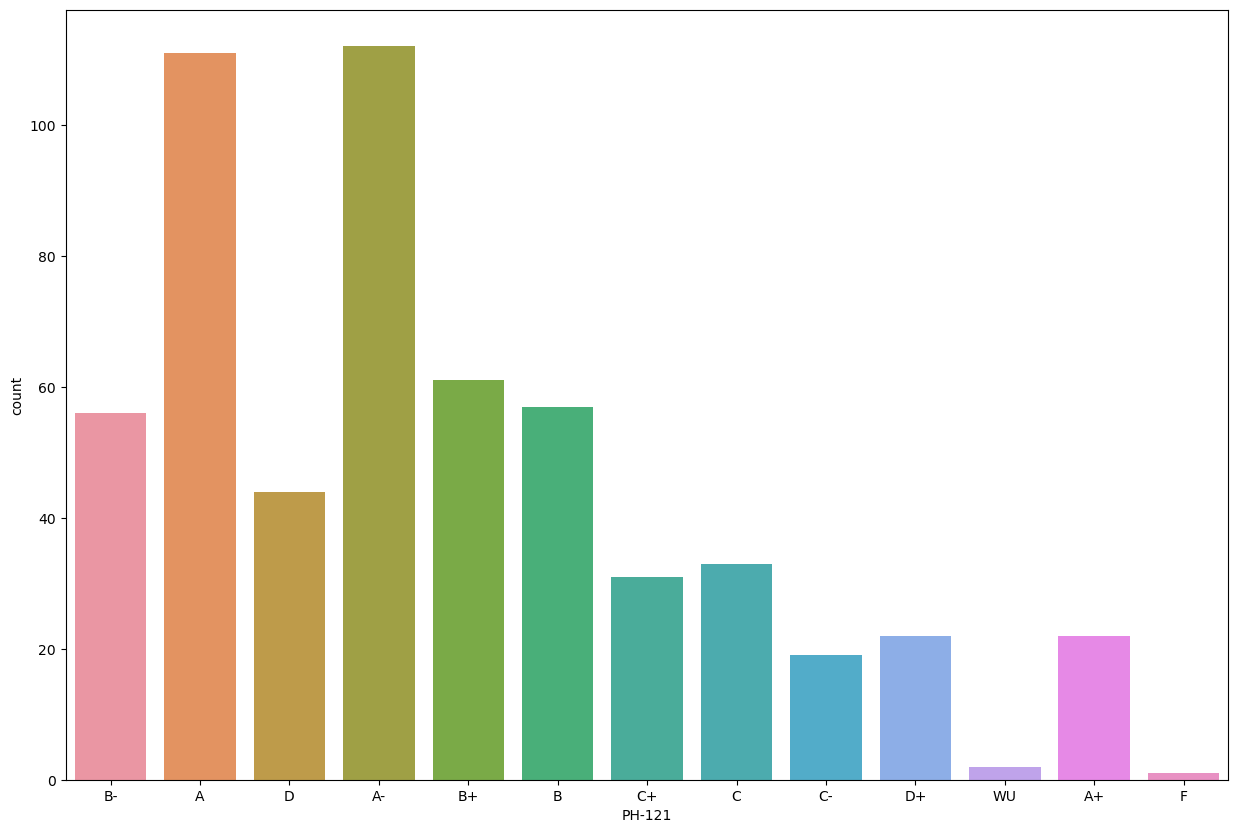

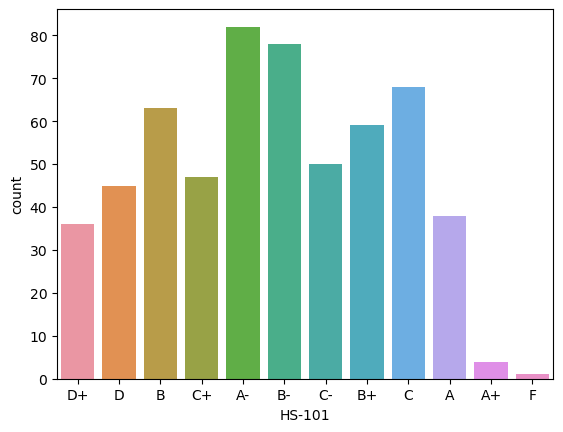

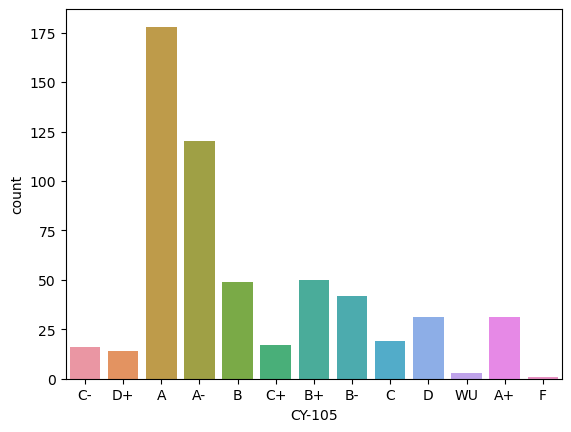

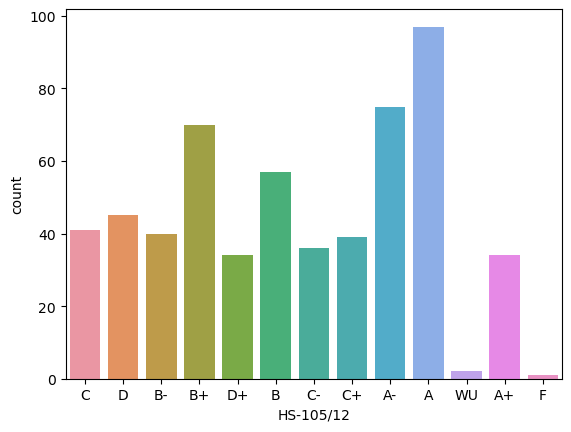

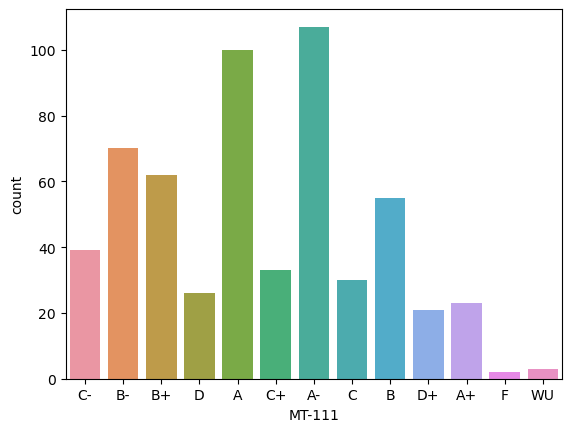

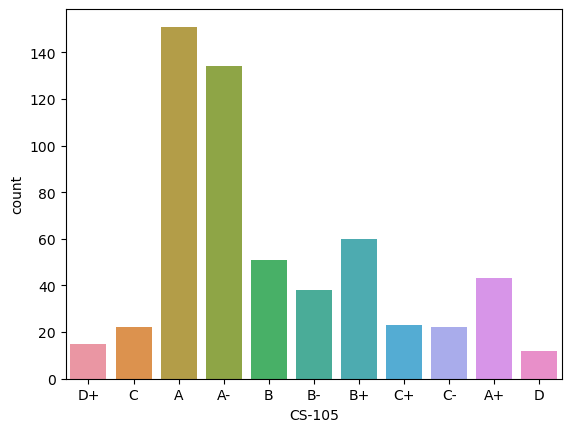

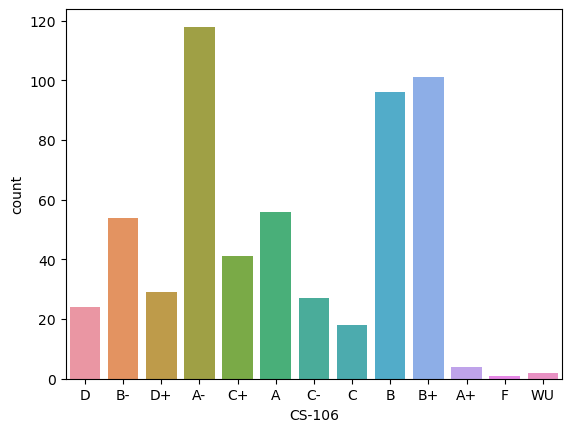

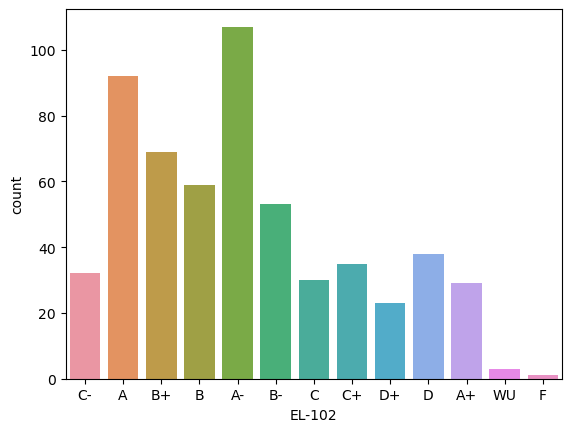

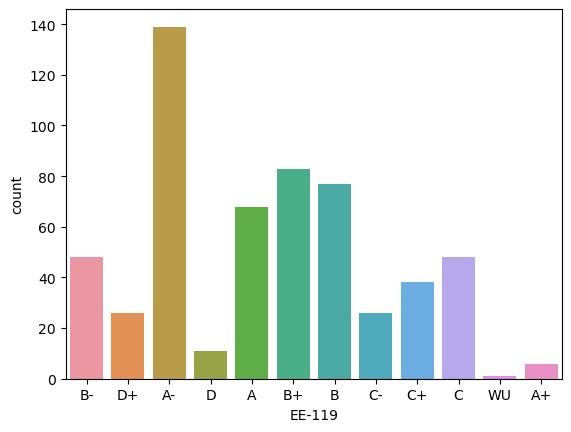

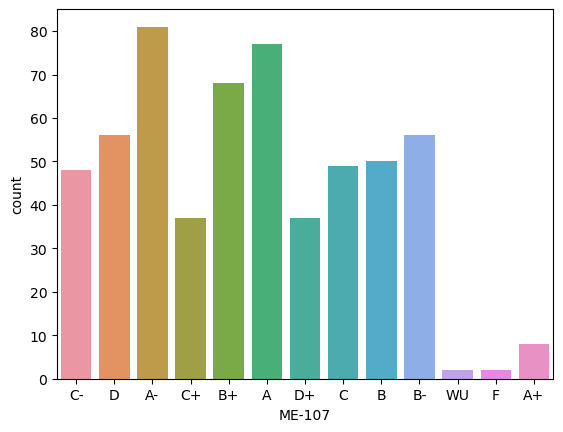

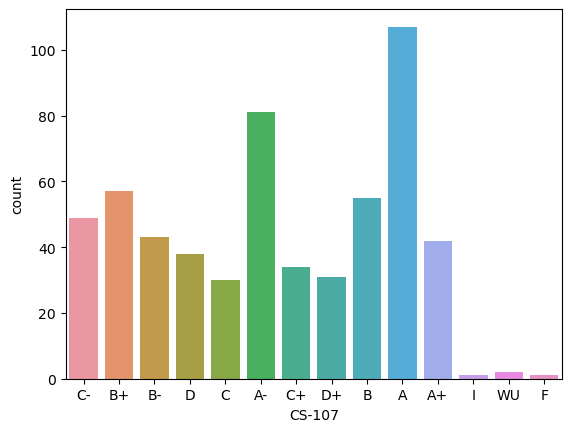

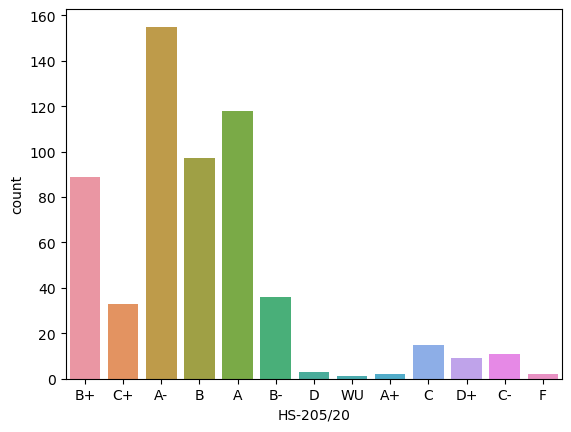

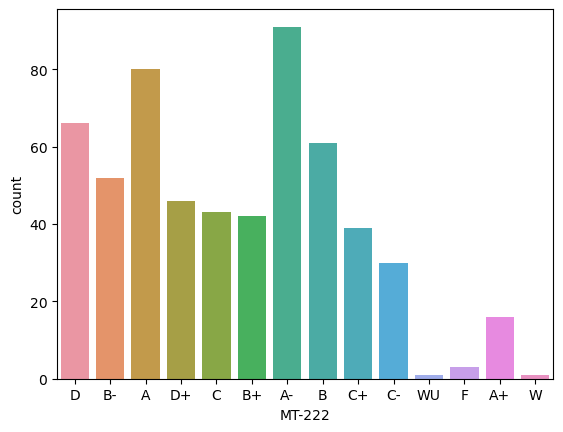

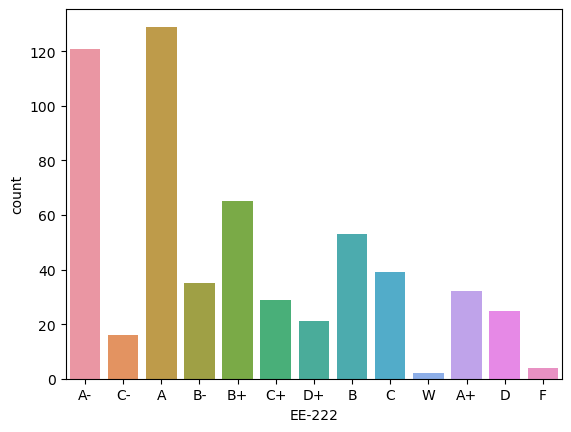

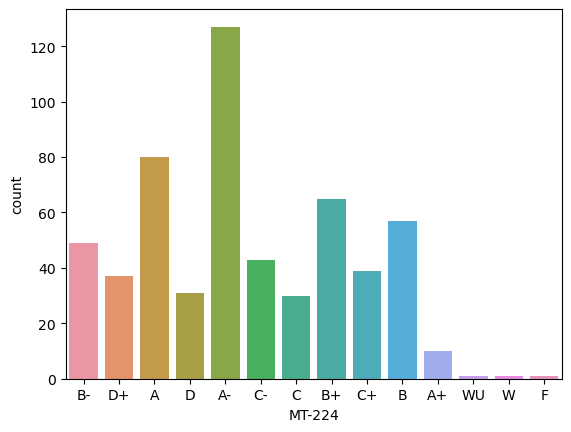

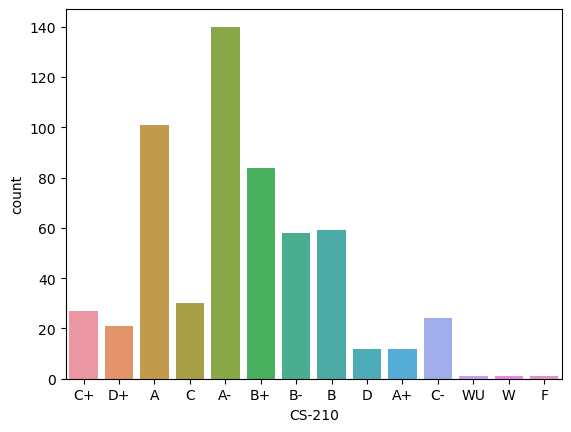

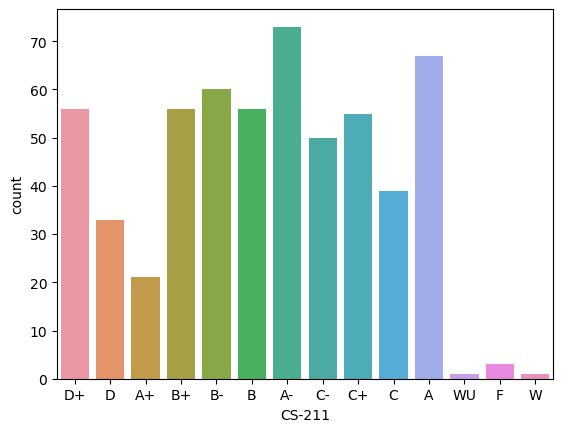

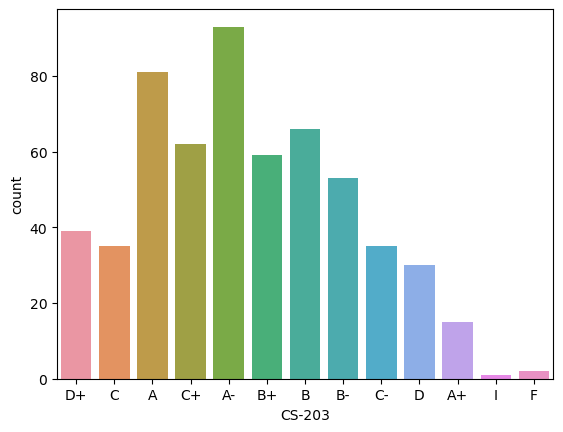

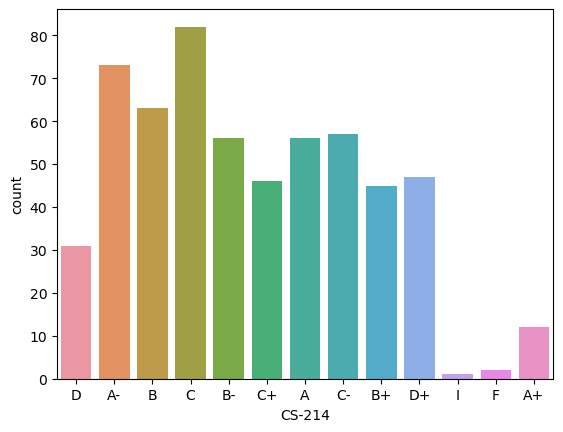

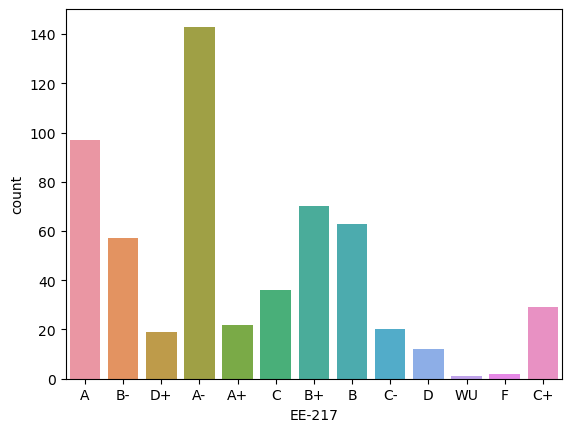

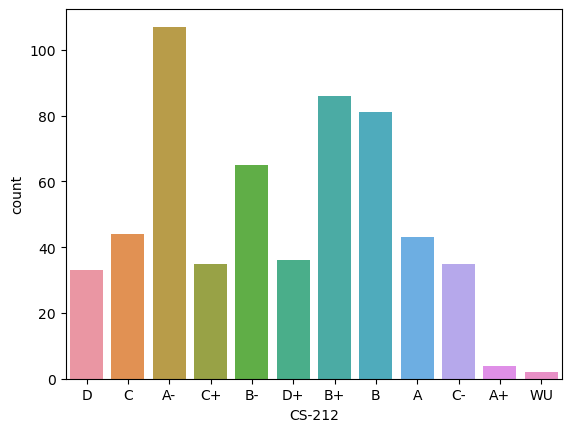

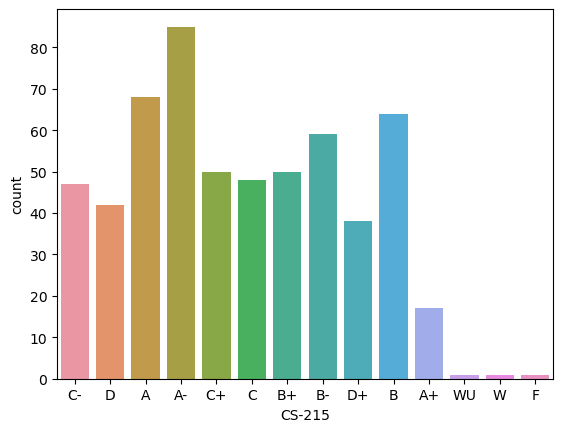

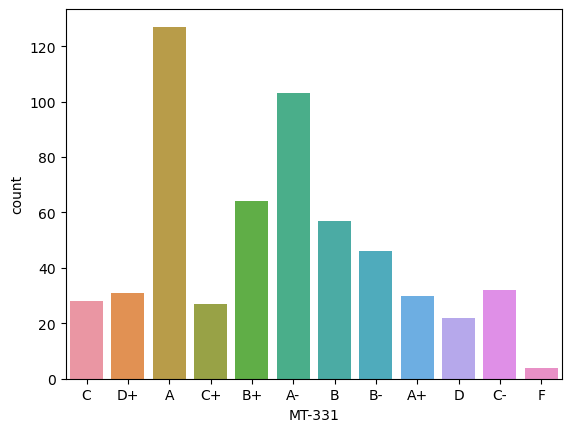

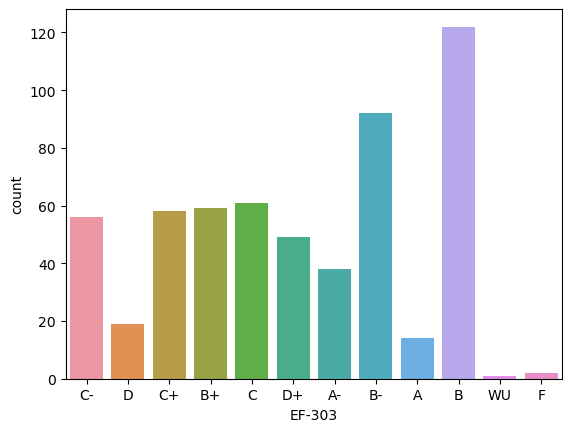

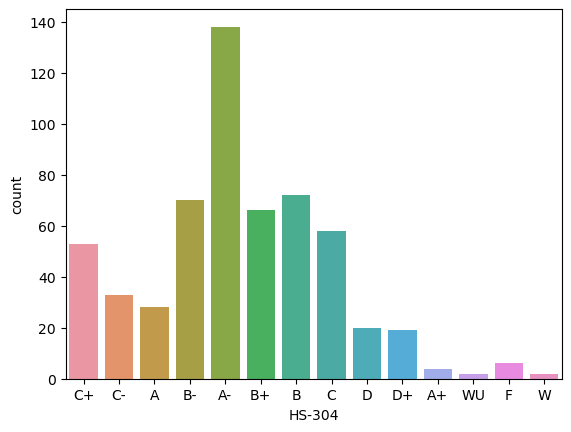

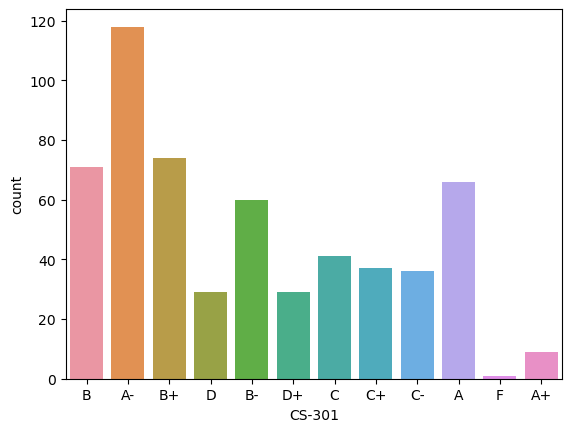

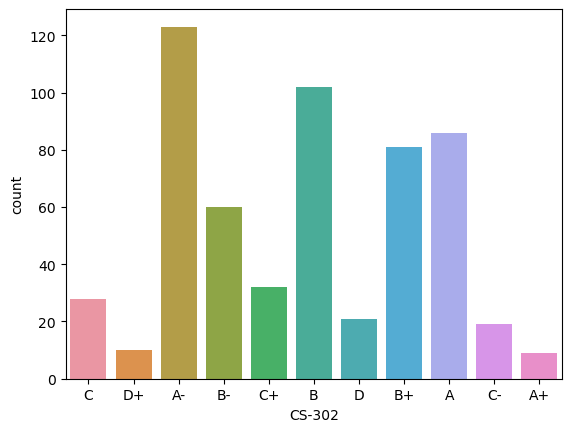

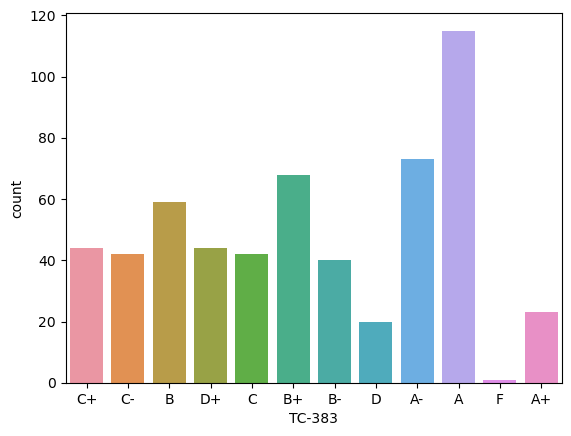

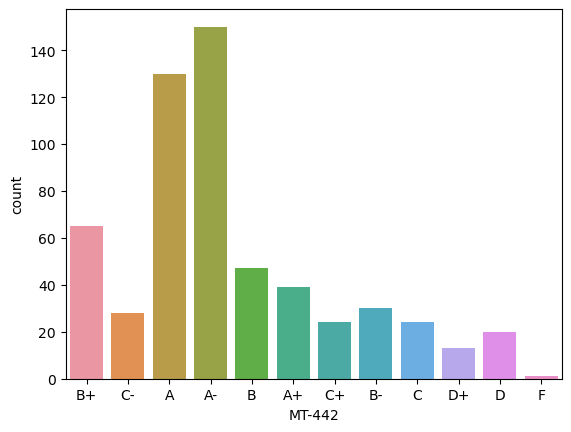

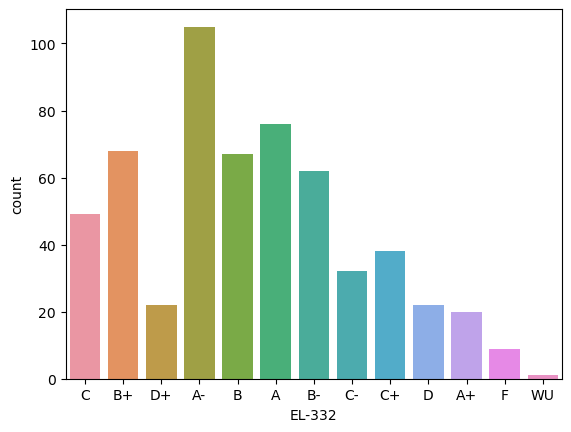

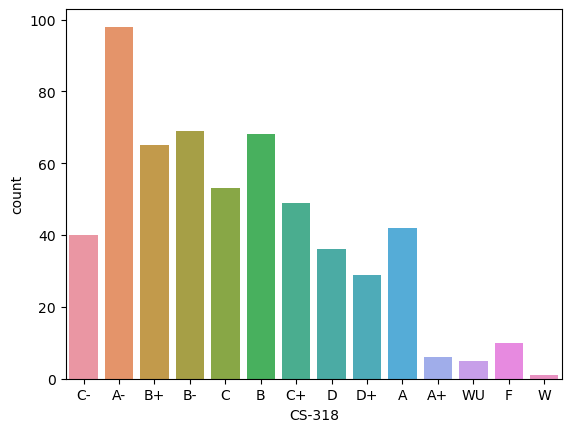

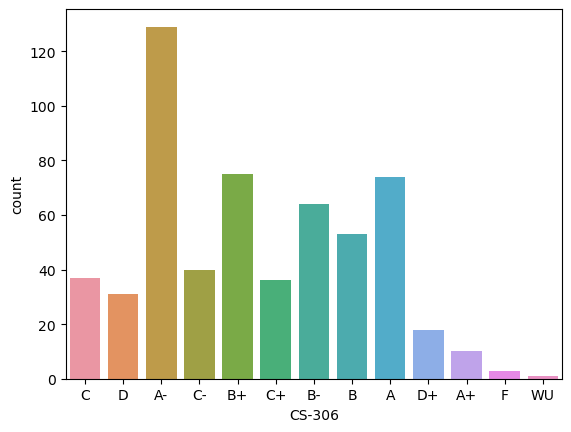

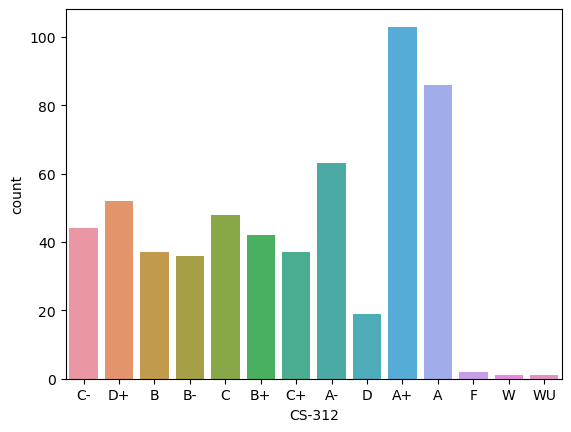

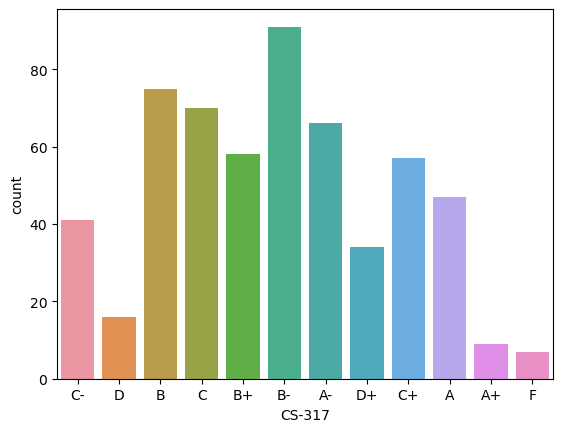

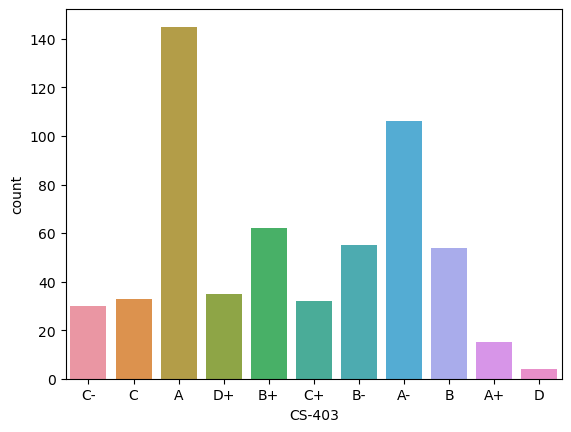

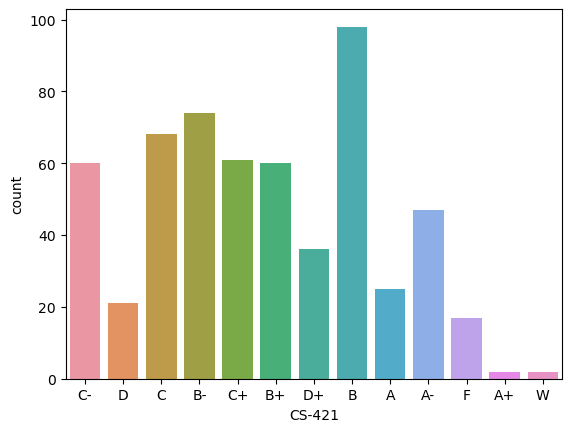

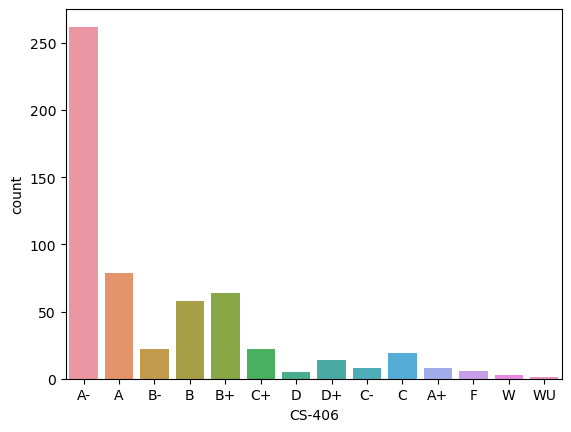

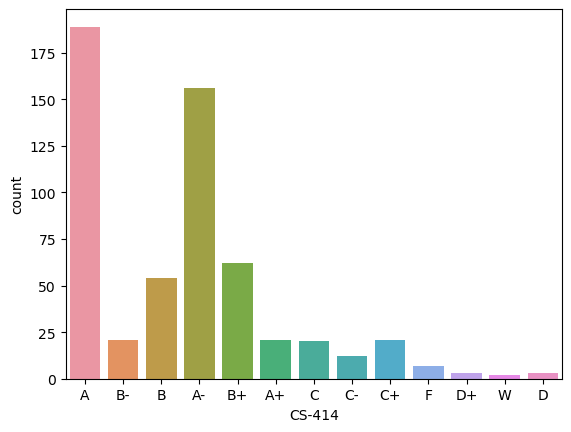

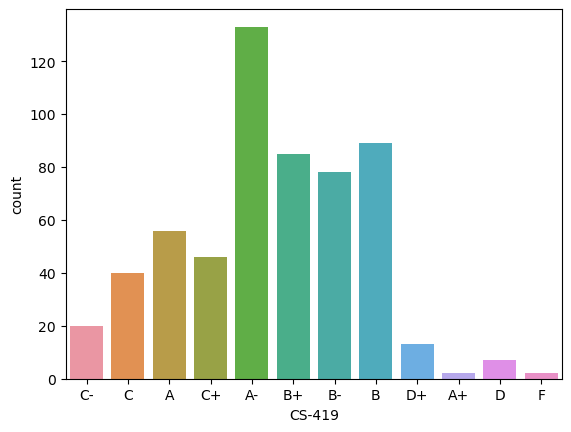

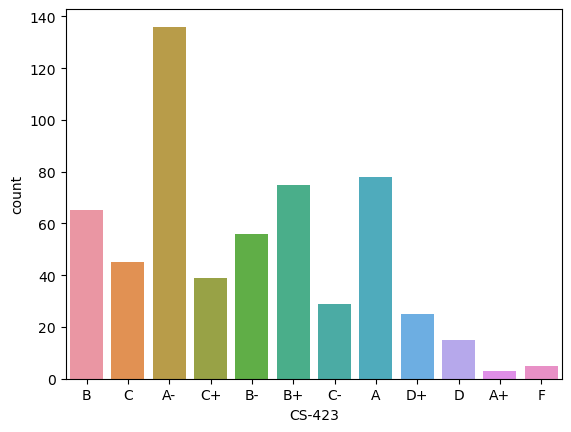

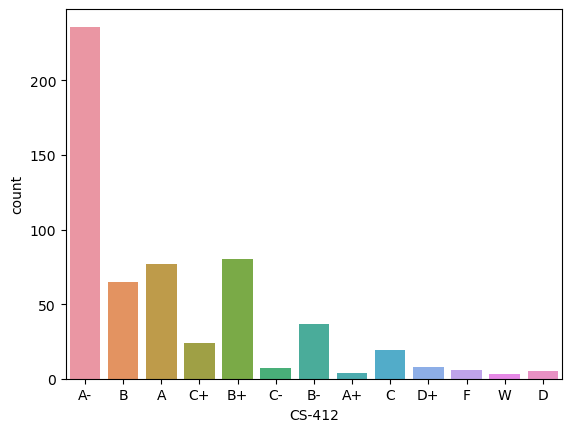

In [11]:
plt.figure(figsize=(15,10))
for col in categorical_columns:

        sns.countplot(x=df[col],data=df)
        plt.show()

# Observation
from count plot we can observe that all columns with dtype=object have 10 to 15 unique categories and all are having some counts

In [12]:
for col in categorical_columns:
    
    print('value counts =\n',df[col].value_counts())

value counts =
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
value counts =
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
value counts =
 A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
value counts =
 A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
value counts =
 A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
value counts =
 A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64
value counts =

# Observation
from here we can see the value count of each category in each column


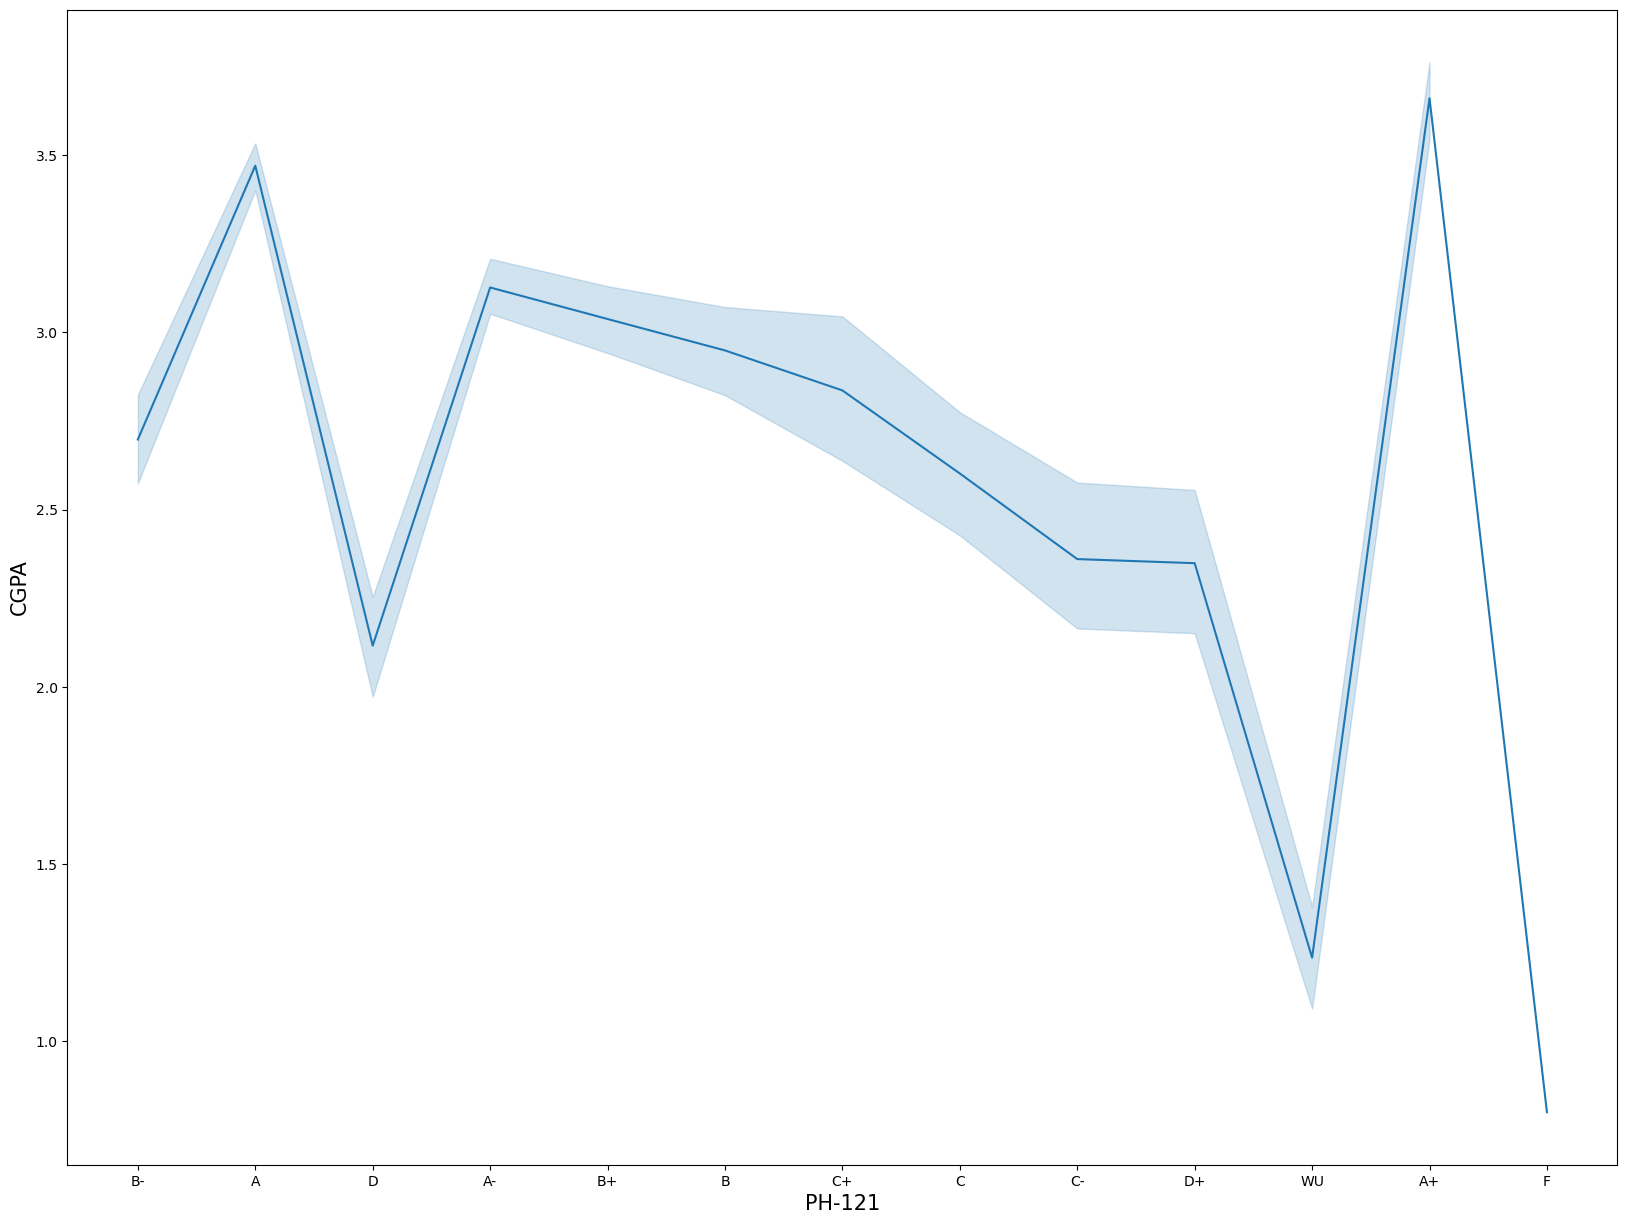

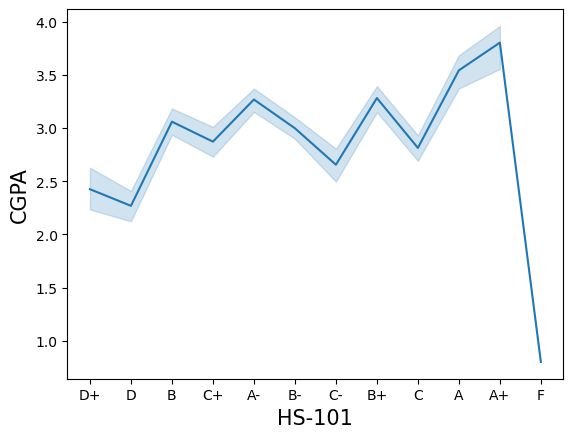

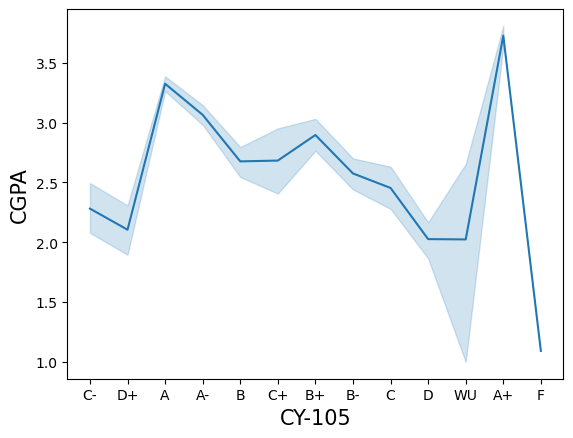

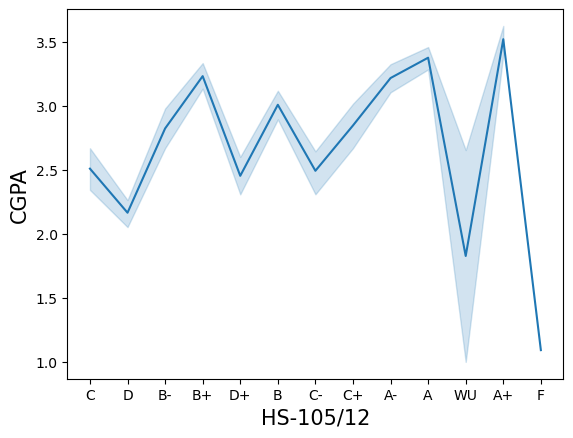

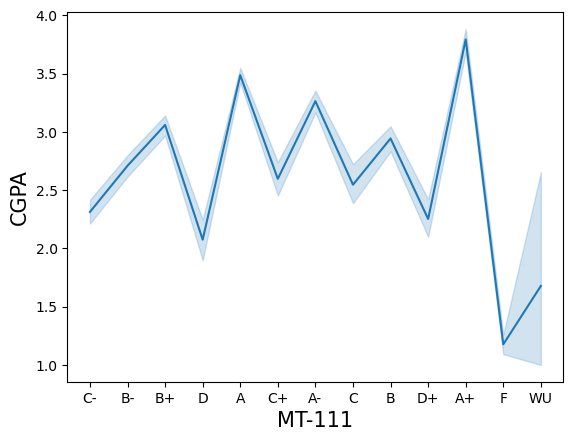

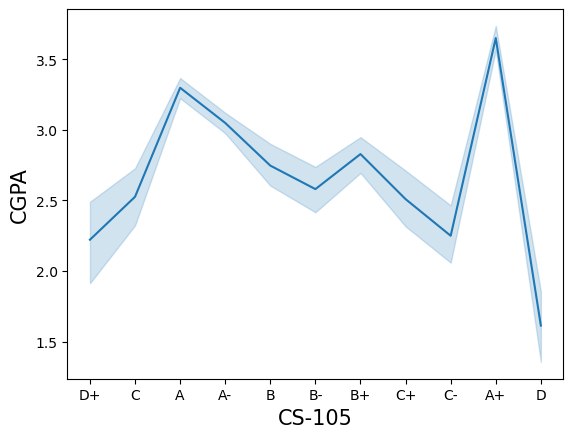

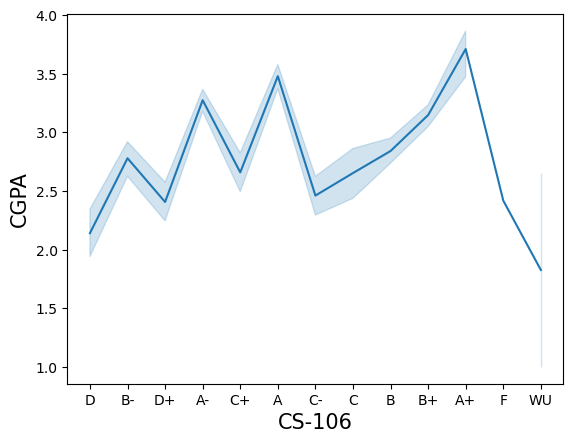

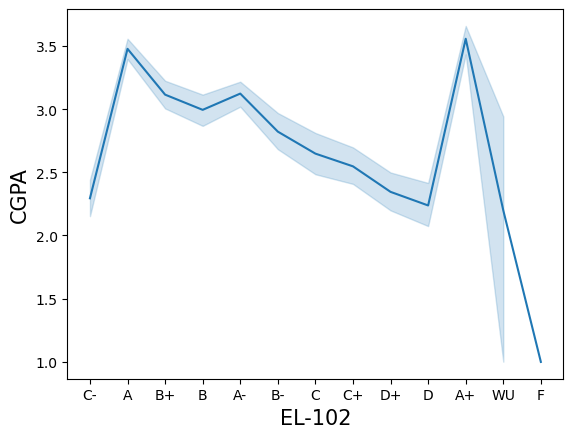

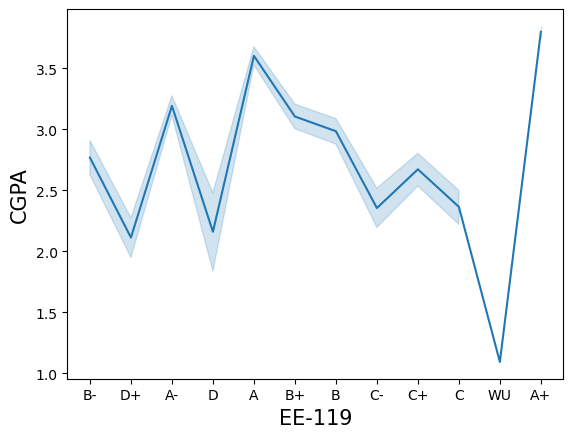

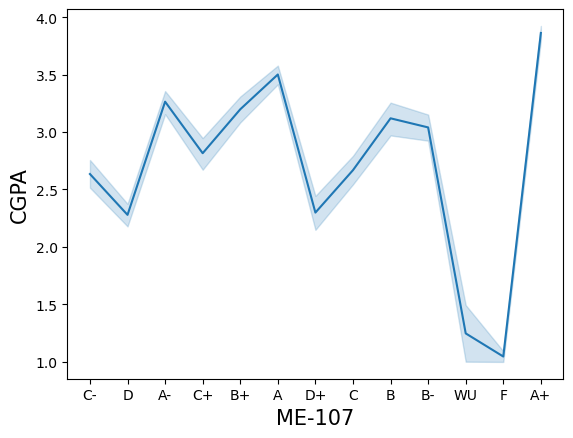

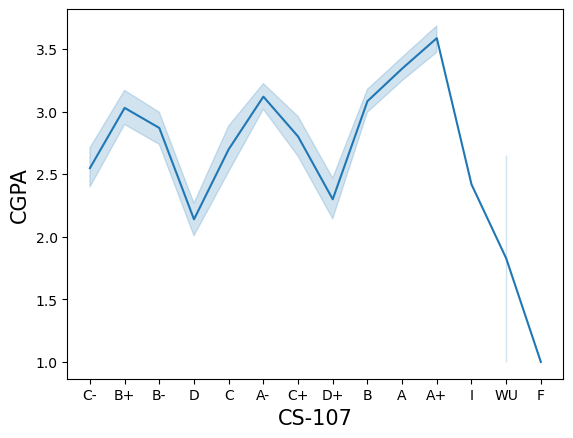

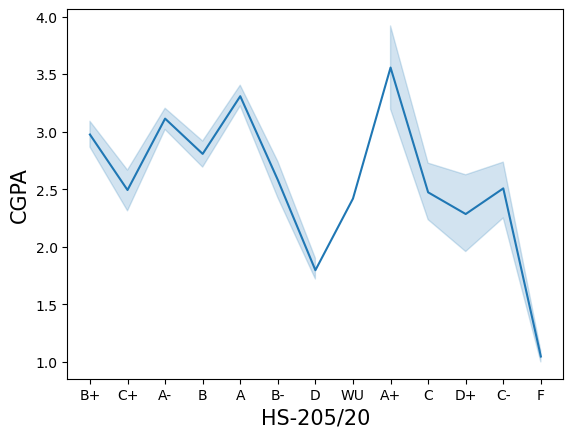

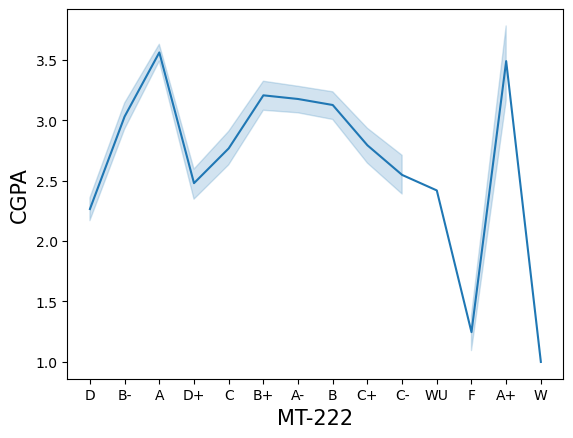

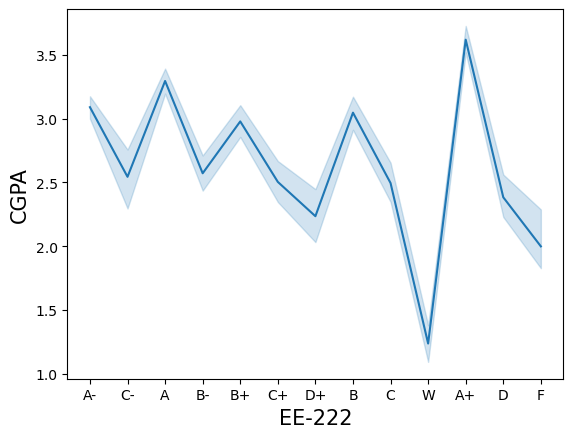

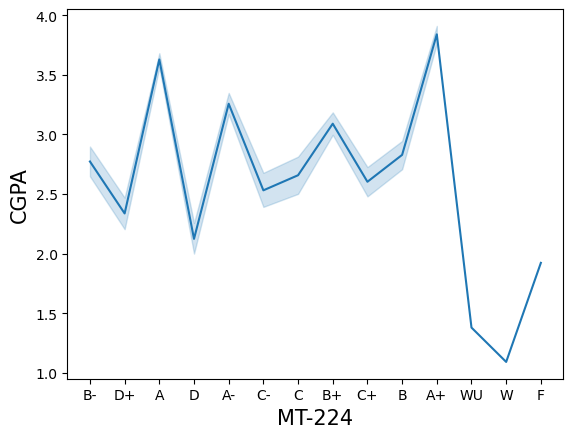

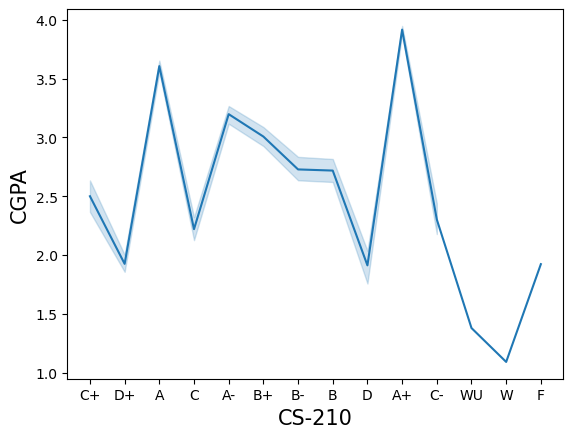

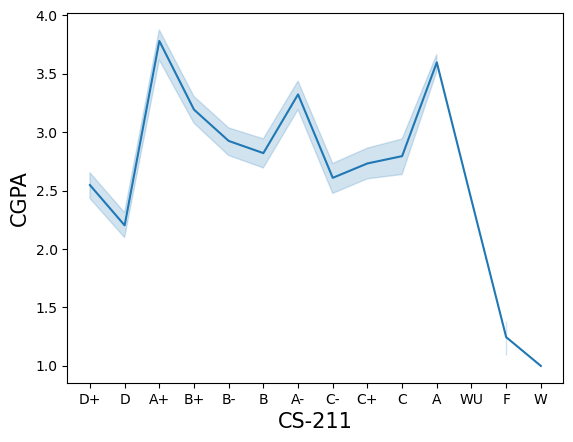

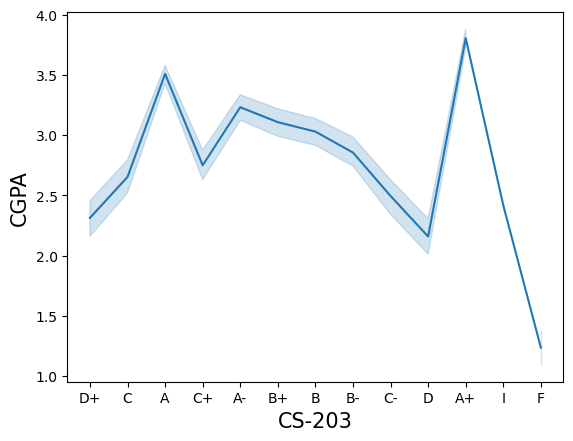

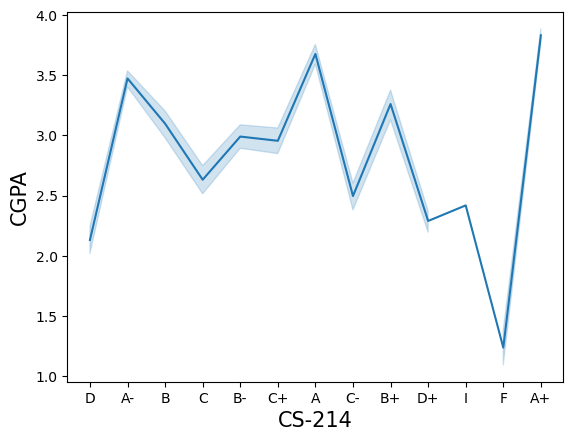

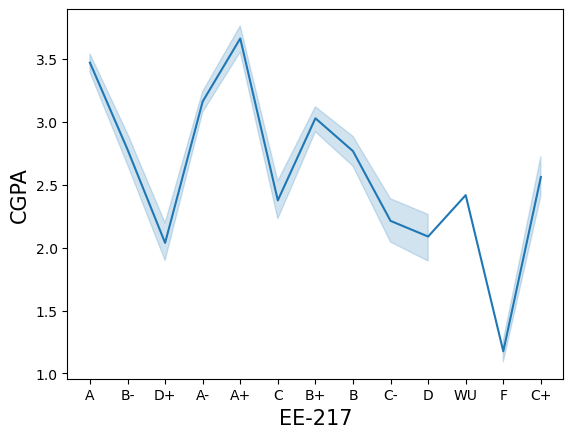

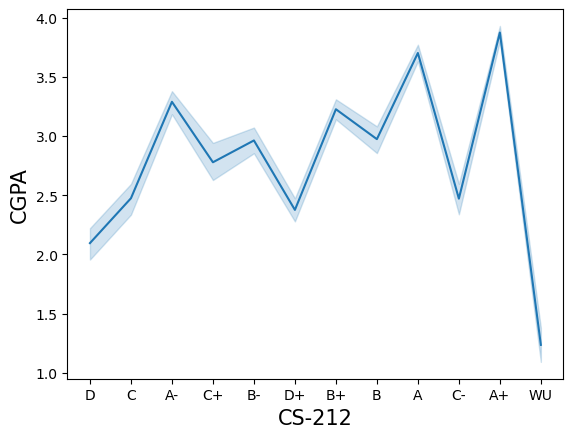

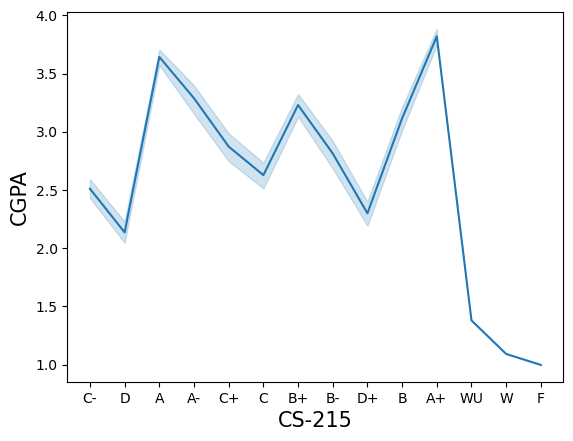

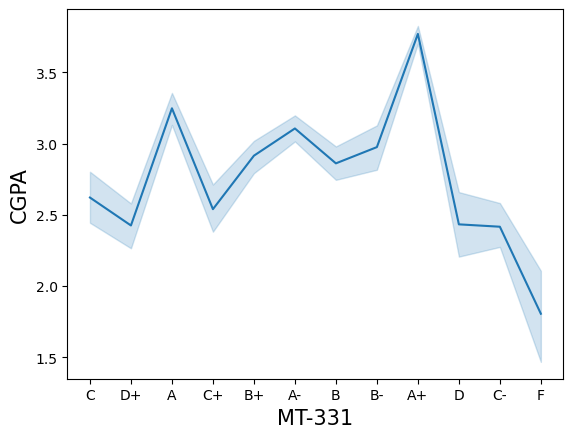

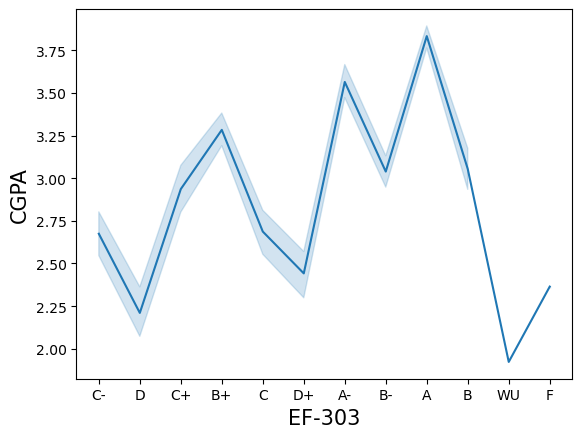

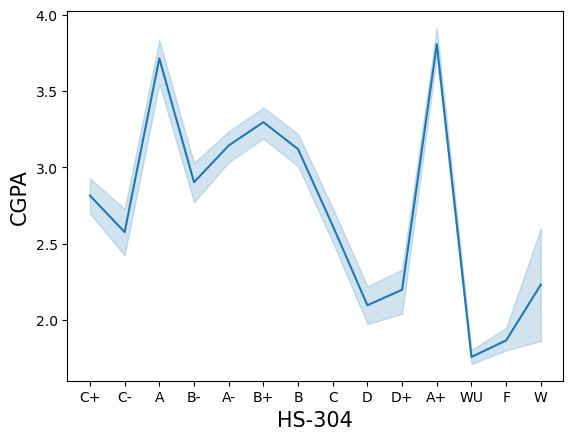

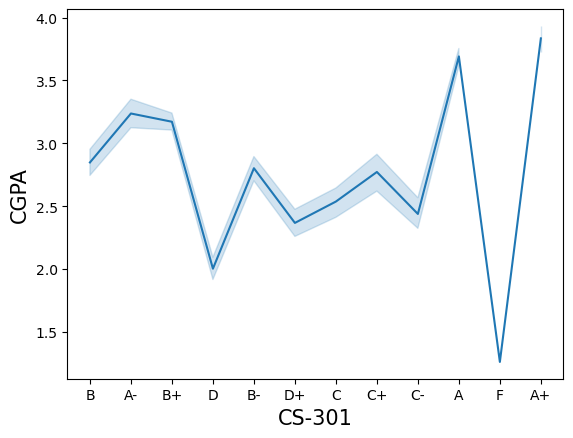

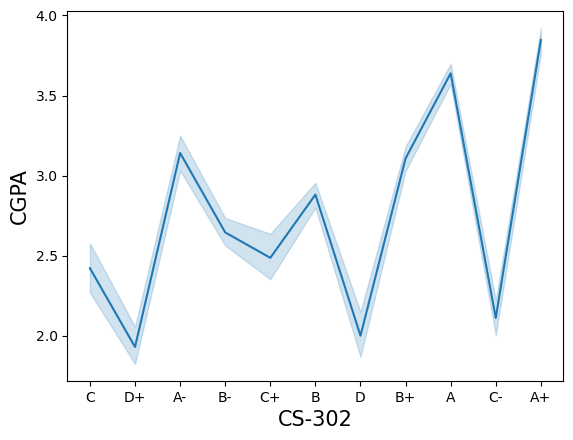

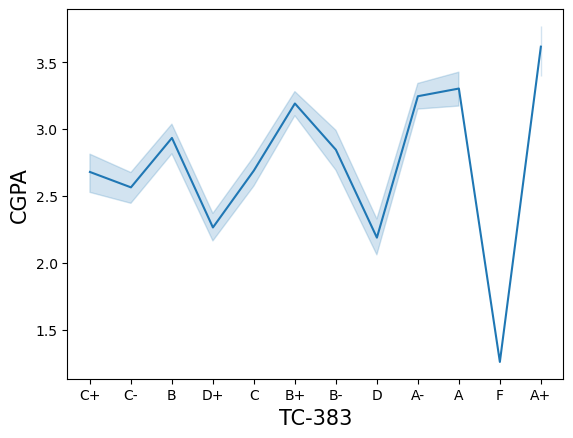

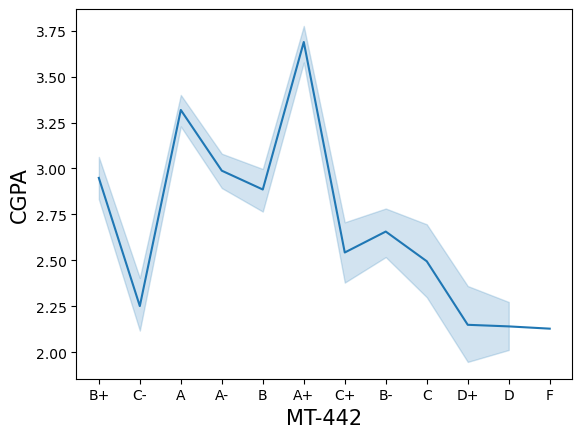

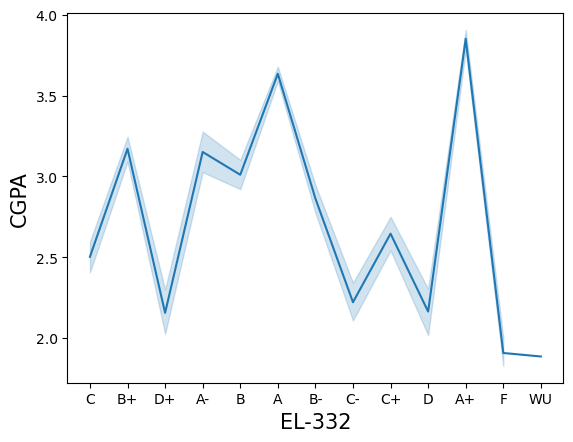

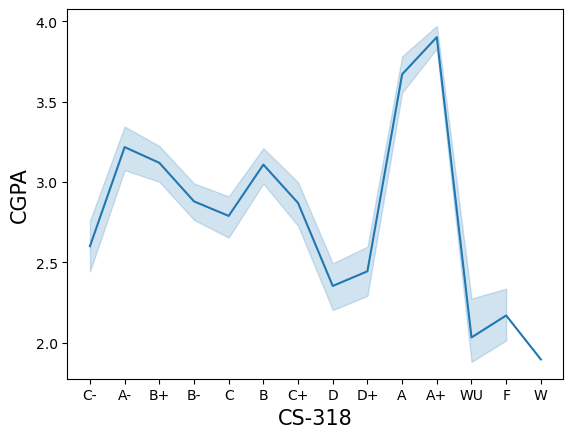

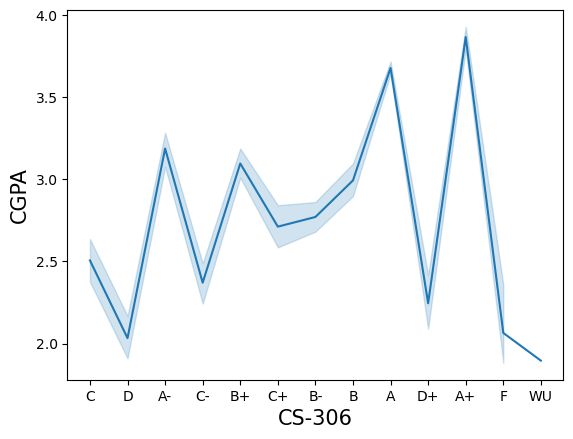

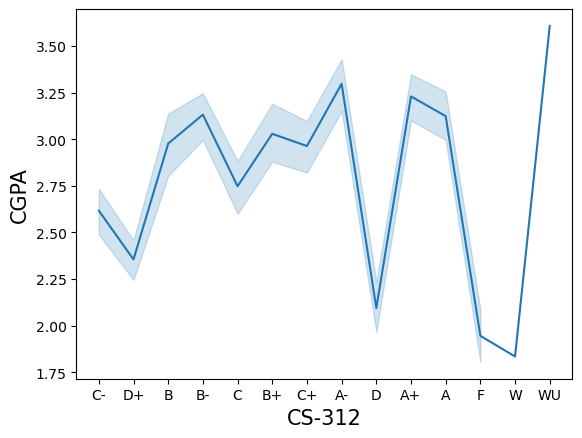

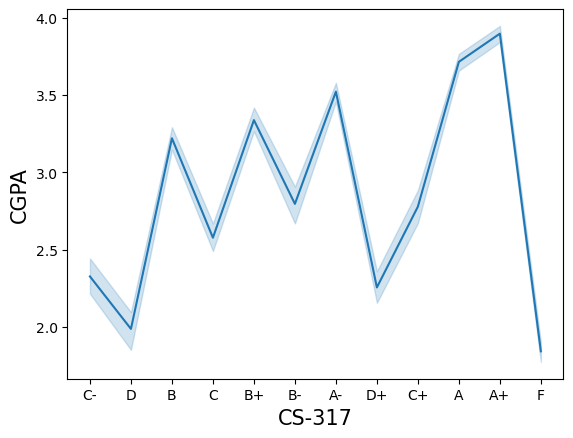

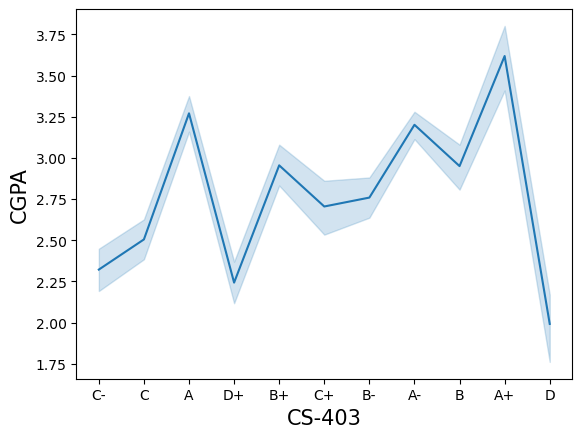

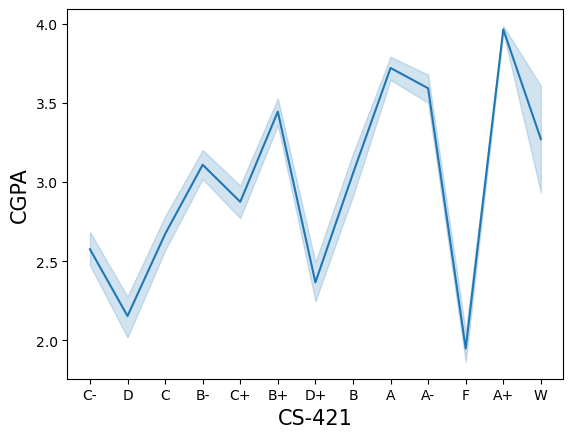

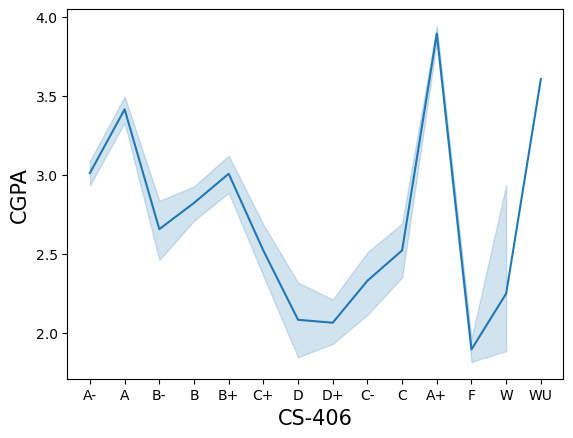

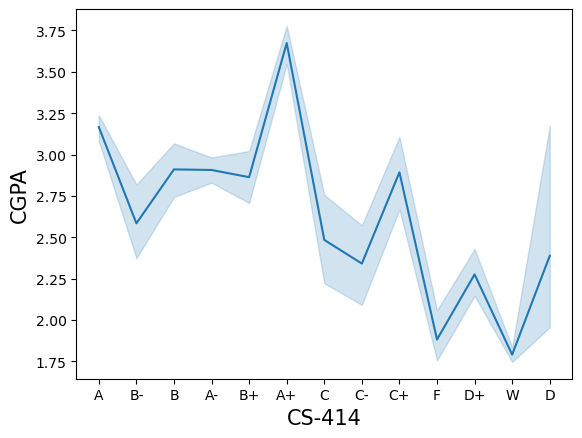

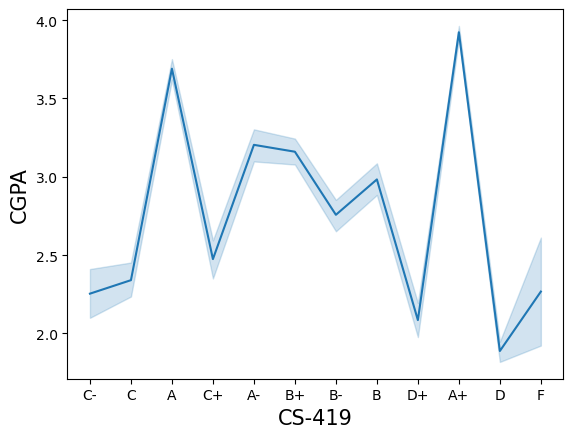

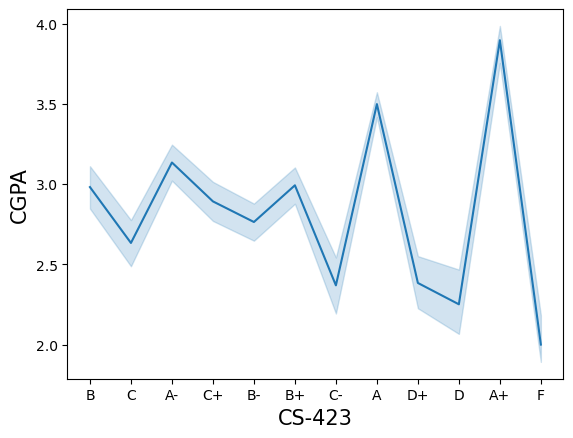

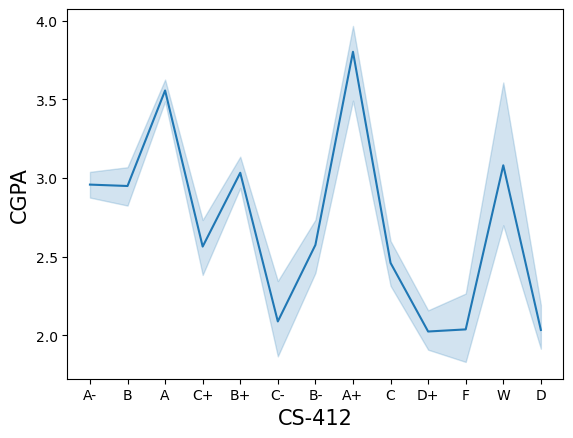

In [13]:
plt.figure(figsize=(20,15))

for col in categorical_columns:
    
    sns.lineplot(x=df[col],y=df['CGPA'],data=df)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('CGPA',fontsize=15)
    plt.show()

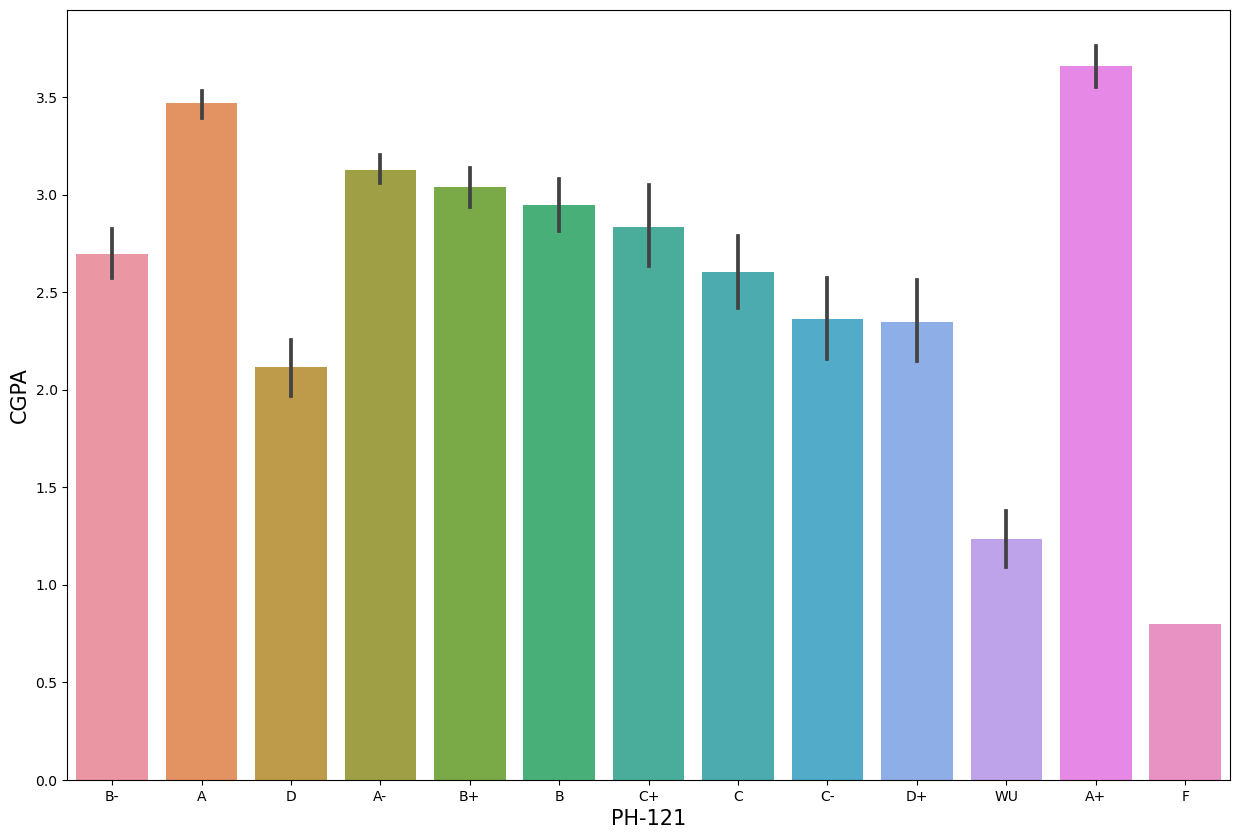

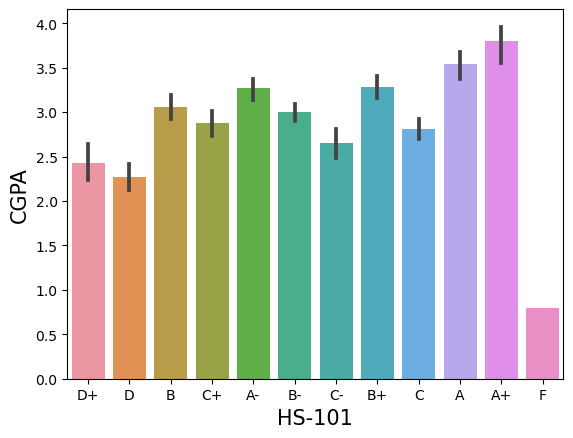

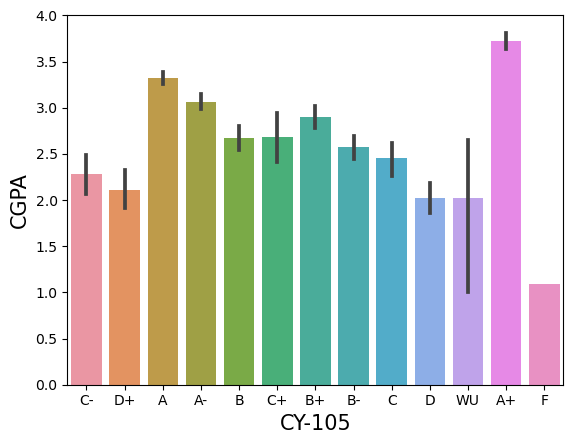

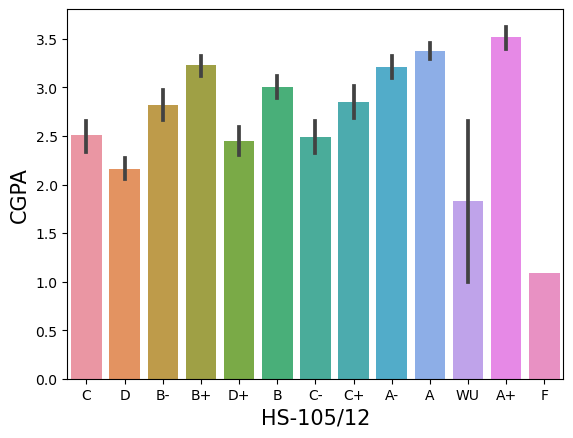

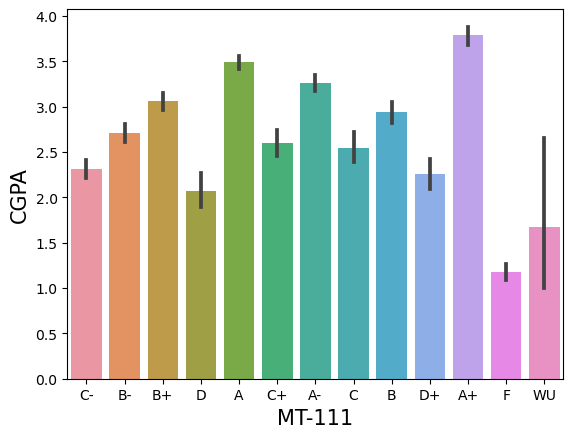

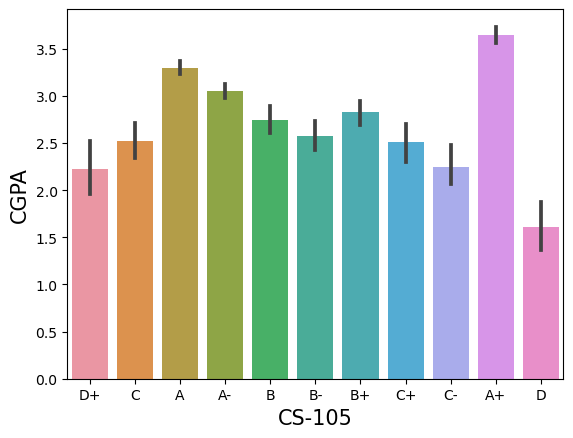

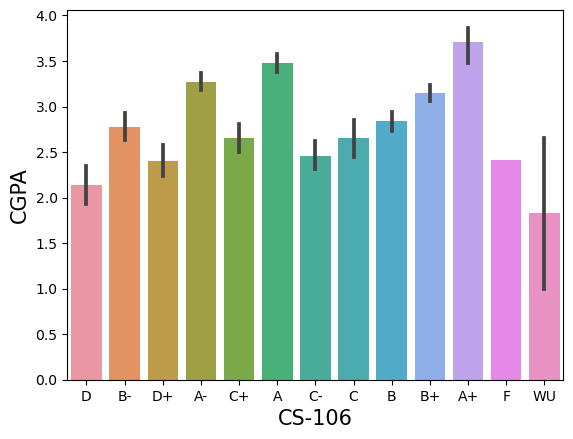

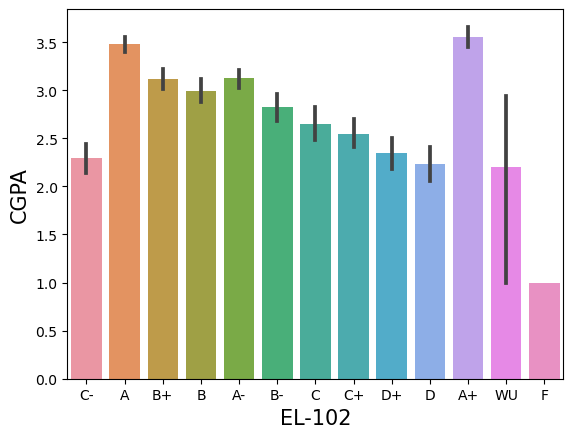

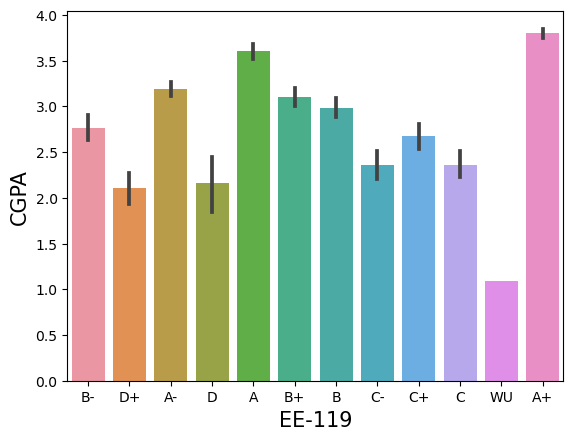

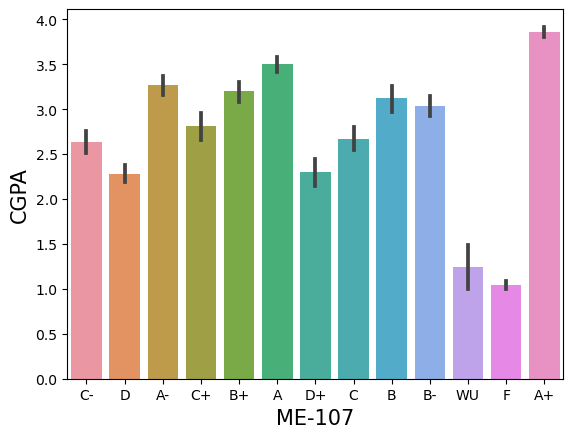

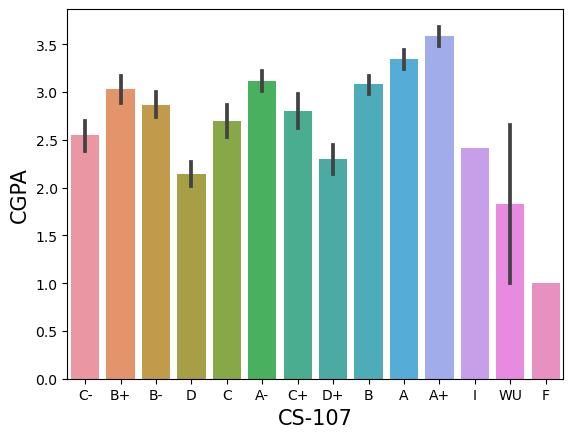

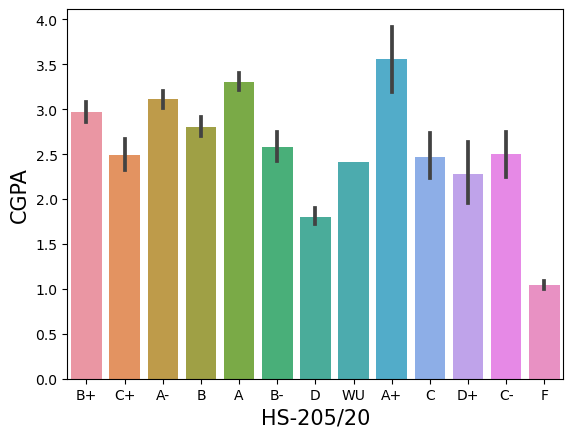

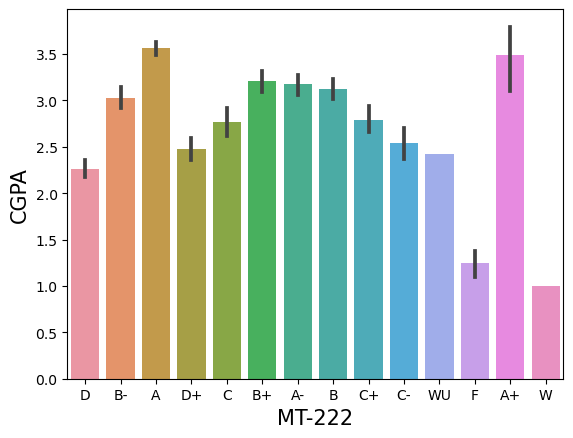

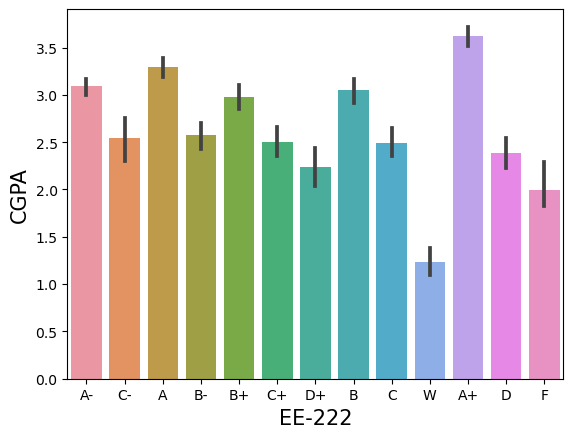

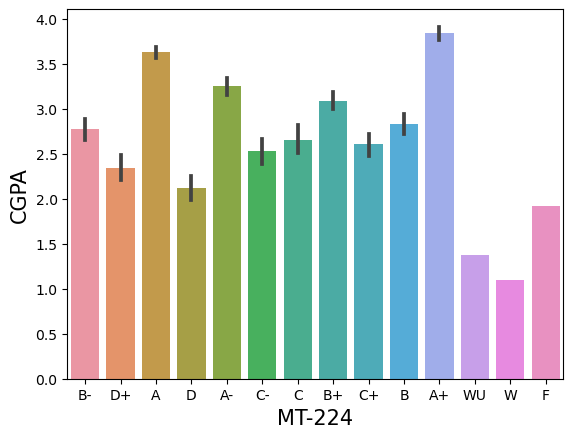

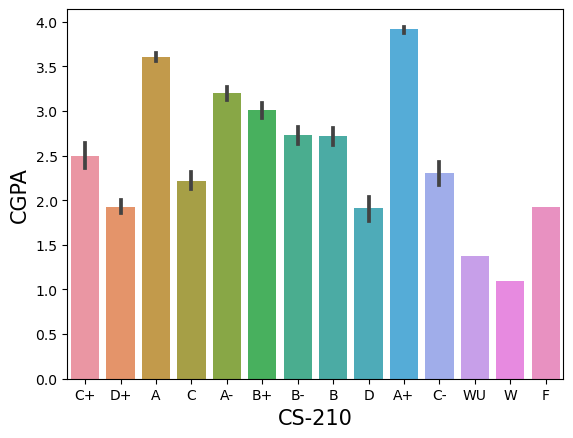

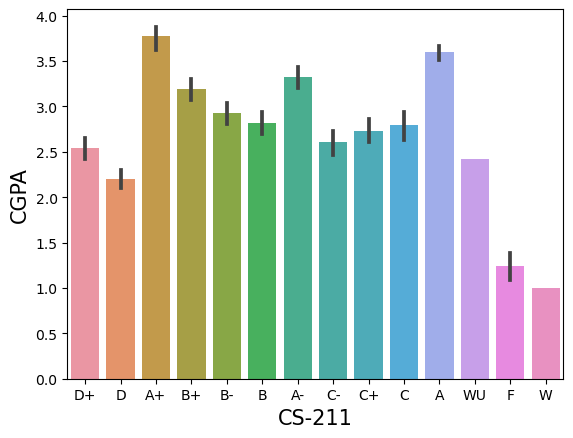

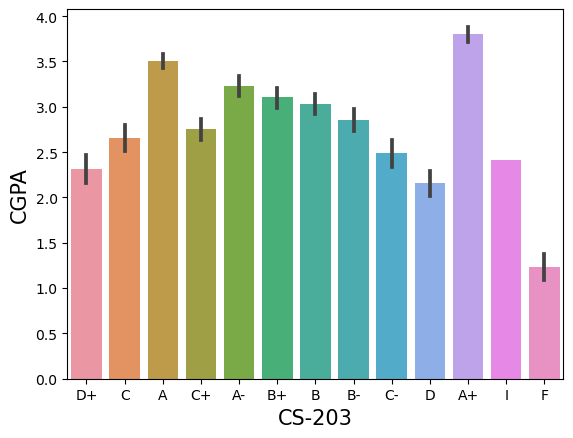

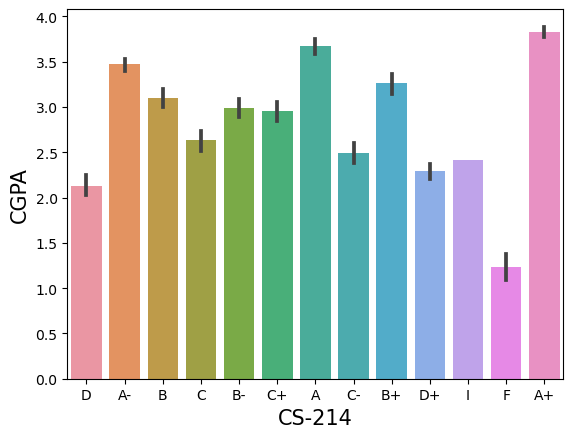

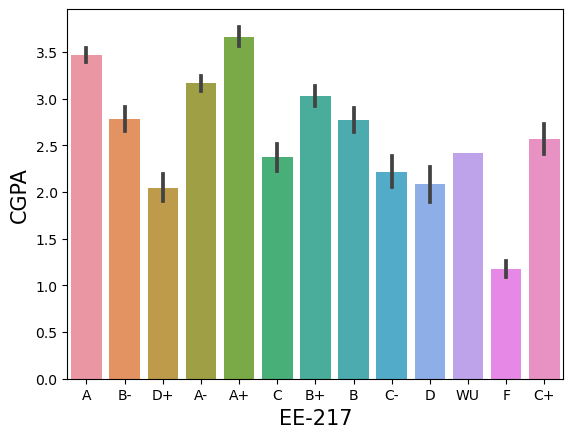

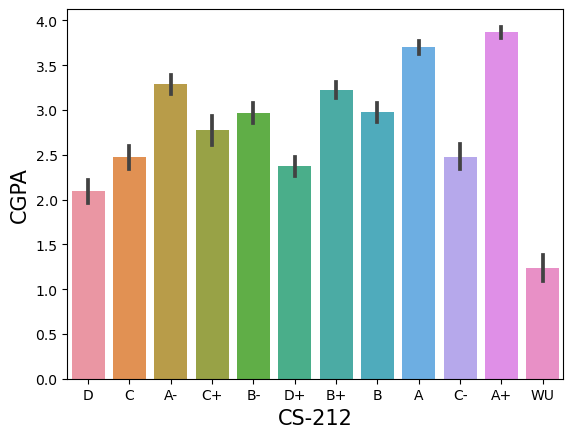

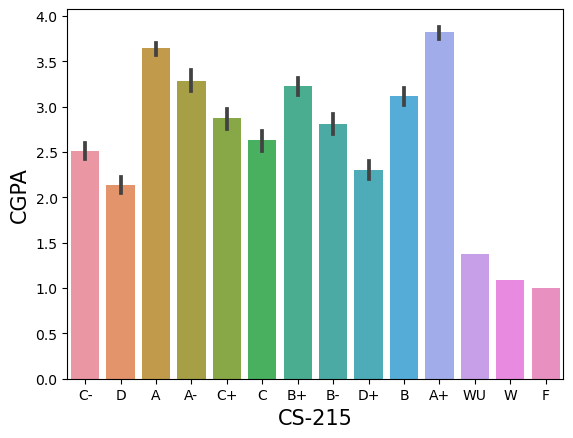

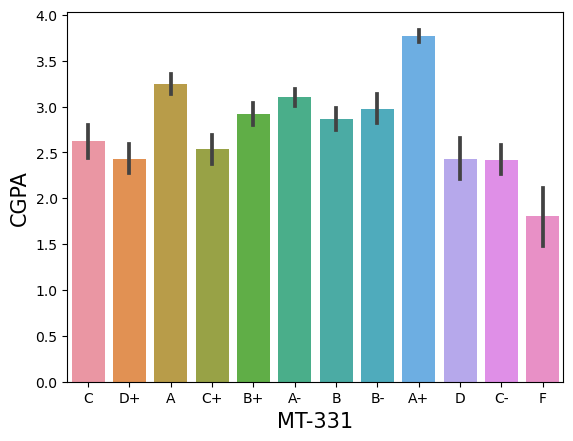

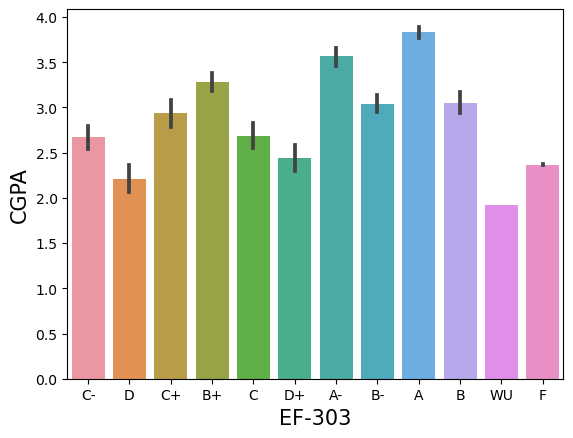

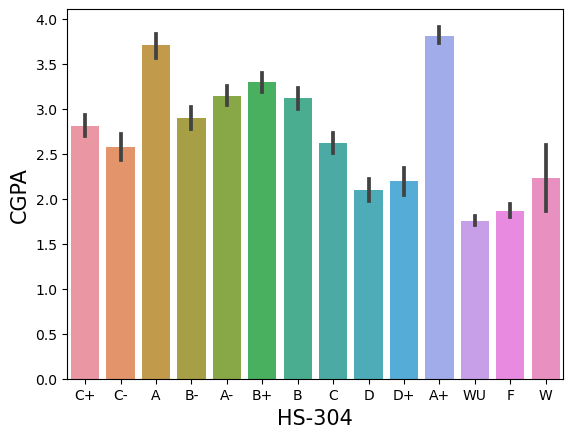

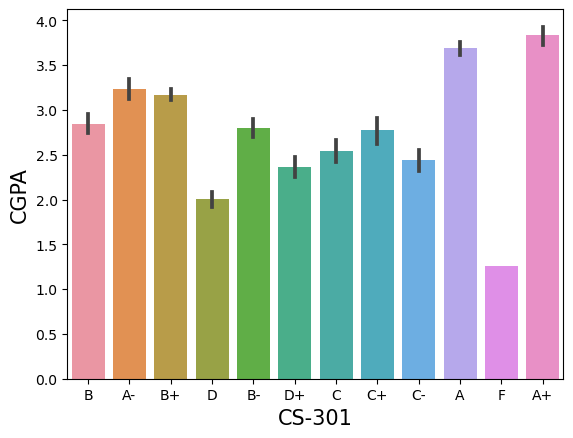

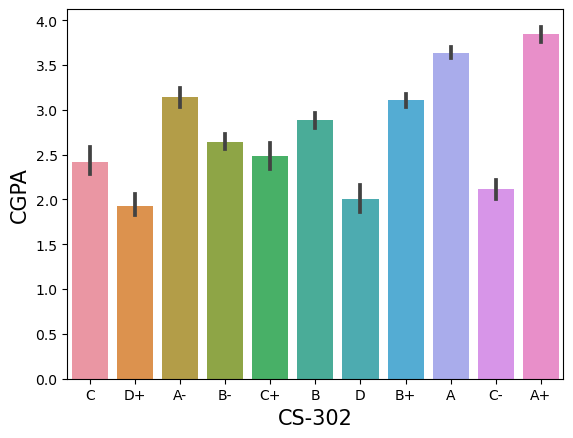

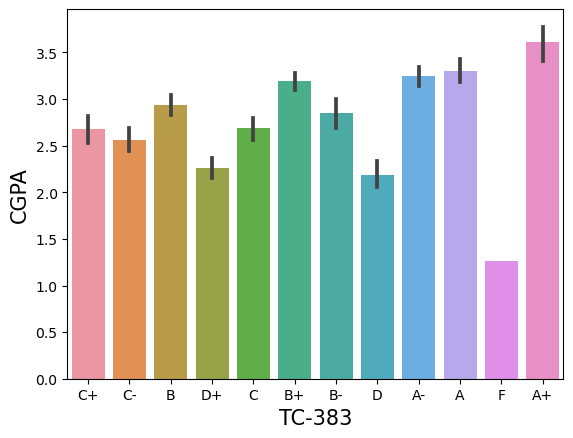

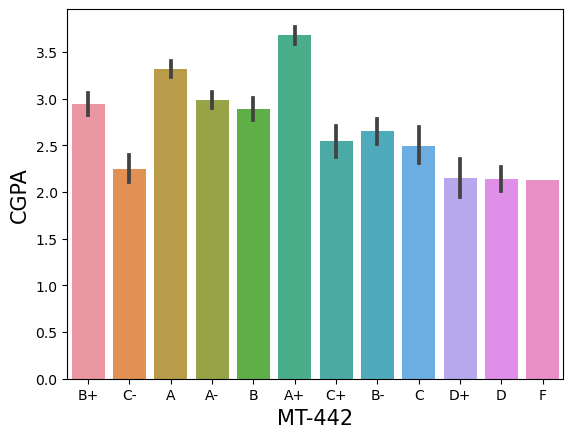

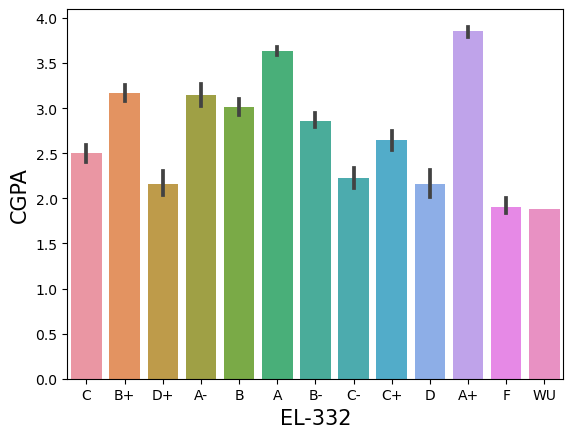

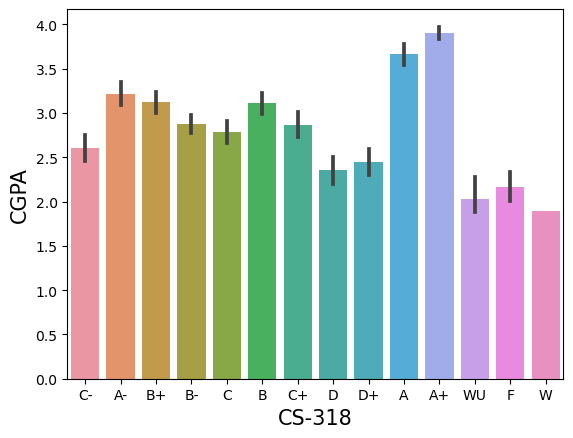

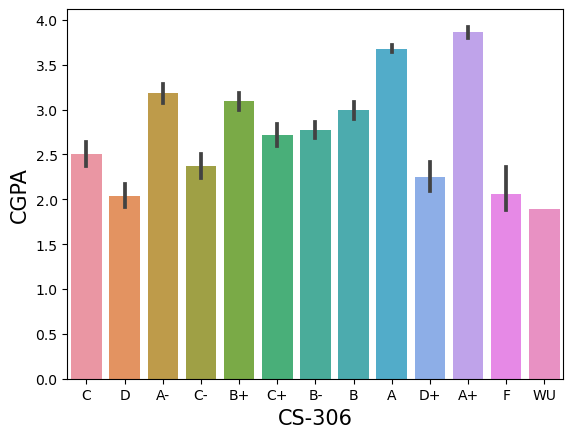

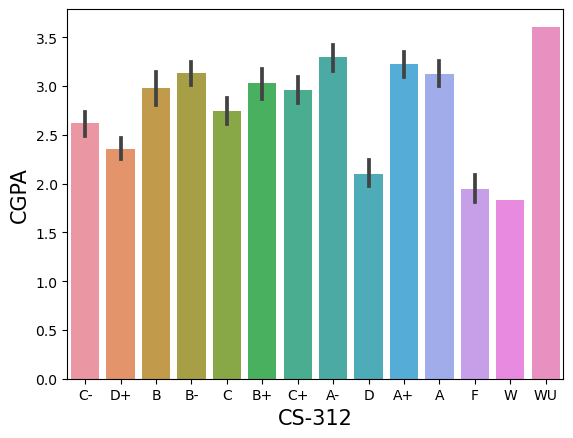

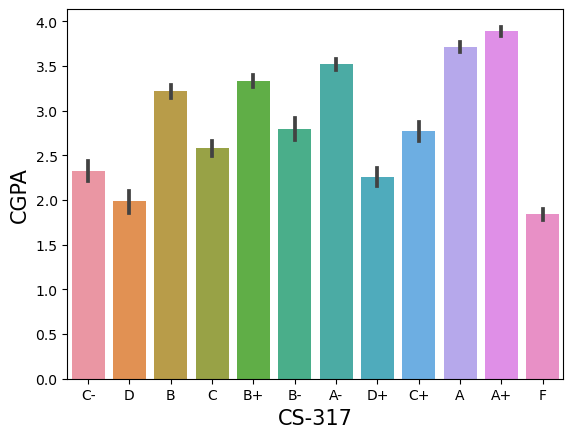

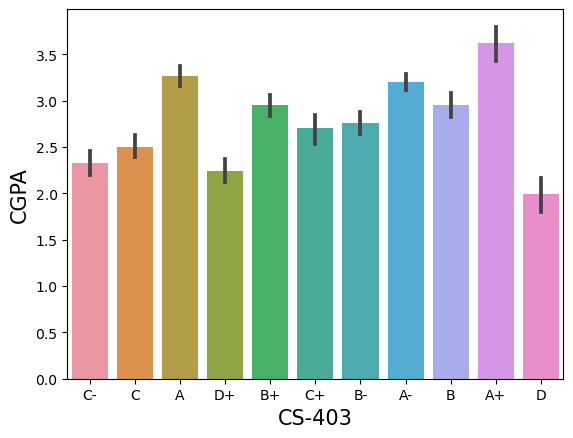

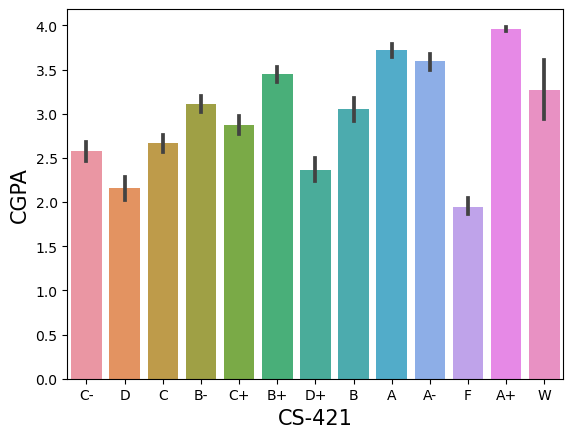

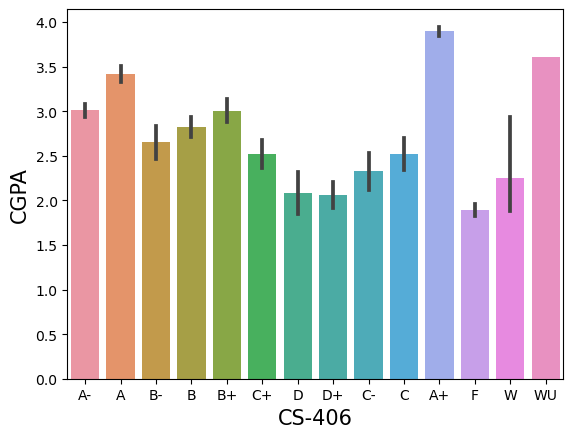

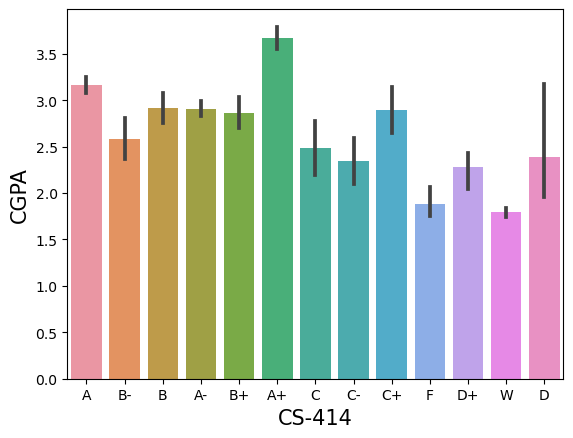

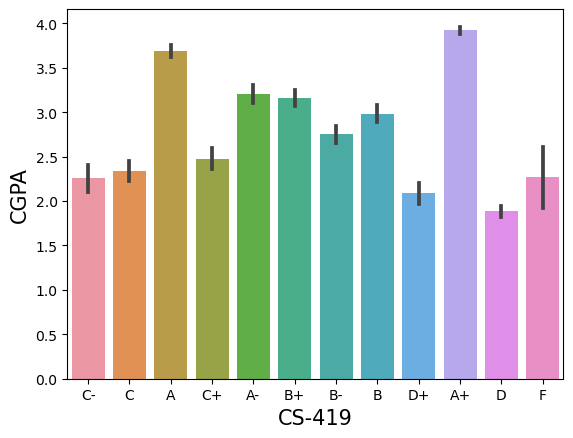

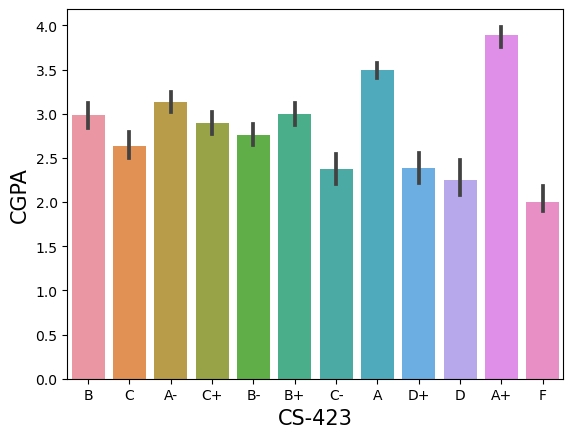

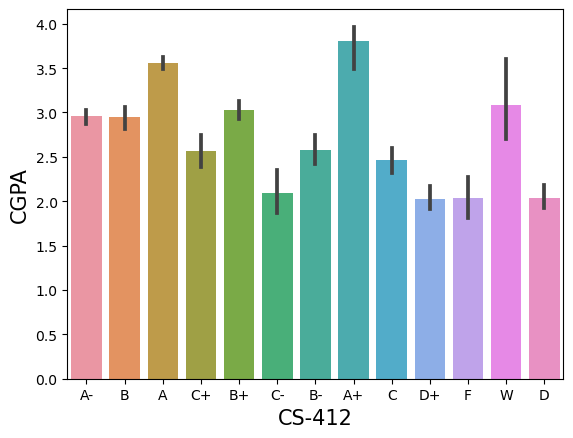

In [14]:
plt.figure(figsize=(15,10))
for col in categorical_columns:
    
    sns.barplot(x=df[col],y=df['CGPA'],data=df)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('CGPA',fontsize=15)
    plt.show()

# Observation
from here we can observe that features and labels are related in some manner

# Lets encode using label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype == object:
        label = LabelEncoder()
        df[col] = label.fit_transform(df[col])

In [16]:
df.head()

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0       5      10       8          6       8      10       9       8       5   
1       0       9      10          9       5       6       9       0      10   
2       0       3       0          5       4       0       5       4       2   
3       9       7      10          9       9       2      10       8       9   
4       2       2       2          4       0       0       2       4       0   

   ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  \
0       8  ...       8       8       8       8       2       0       8   
1       9  ...      10       9       6       9       2       5       6   
2       2  ...       3       3       0       6       0       0       0   
3       7  ...      10       6      10       8       5       3       7   
4       2  ...       5       4       4       5       2       0       2   

   CS-423  CS-412   CGPA  
0       3       2  2.205  
1       6       3  2.008  
2       2       0  3.608  
3       7       7  1.906  
4       2       0  3.448  

[5 rows x 42 columns]

# Observation 
As our dataset have too many features ,let's first use feature selection tech to select best features.

But before that lets separate features and labels

In [17]:
#separate features and labels
X=df.drop('CGPA',axis=1)
y=df.CGPA

In [18]:
X.shape

(571, 41)

In [19]:
y.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

# Let's use selectkbest to select best features

In [20]:
from sklearn.feature_selection import SelectKBest,f_classif

In [21]:
best_feat=SelectKBest(score_func=f_classif,k=41)
fit=best_feat.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(41,'Score'))

   Feature_Name     Score
15       CS-210  4.701042
26       CS-302  4.181921
33       CS-317  3.495694
0        PH-121  3.272326
2        CY-105  3.063033
18       CS-214  2.895026
16       CS-211  2.818531
31       CS-306  2.786214
29       EL-332  2.711272
28       MT-442  2.632262
21       CS-215  2.628844
20       CS-212  2.576030
25       CS-301  2.456811
39       CS-423  2.371858
22       MT-331  2.352352
34       CS-403  2.224944
4        MT-111  2.194422
5        CS-105  2.158129
14       MT-224  2.155294
8        EE-119  2.104648
17       CS-203  2.076506
6        CS-106  1.980489
3     HS-105/12  1.941191
9        ME-107  1.923211
38       CS-419  1.911457
13       EE-222  1.894694
7        EL-102  1.849903
37       CS-414  1.782997
35       CS-421  1.780733
12       MT-222  1.761360
24       HS-304  1.744321
10       CS-107  1.657122
19       EE-217  1.650263
27       TC-383  1.637600
30       CS-318  1.482102
1        HS-101  1.480191
11    HS-205/20  1.407137
40       CS-

# Observation
After using kbest tech we can select features which have score more than 2,but lets use another feature sele tech i.e SelectPercentile for further clarification

i m not deleting any features as score of every course is important in predicting cgpa 

In [22]:
#import selectpercentile
from sklearn.feature_selection import SelectPercentile,chi2

In [23]:
Z=df.drop(['CGPA'],axis=1)
a=df.CGPA

SPercentile=SelectPercentile(score_func=chi2,percentile=70)

Percent=SPercentile.fit(Z,a)
cols=Percent.get_support(indices=True)
print('Feature Index =',cols)
features=X.columns[cols]
print('Features=',list(features))

ValueError: Unknown label type: (array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.443, 3.133, 3.22 , 3.112, 3.16 , 3.019,
       3.164, 3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 1.493,
       2.069, 1.996, 3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793,
       3.023, 3.01 , 3.4  , 1.899, 3.168, 2.57 , 2.418, 2.564, 2.468,
       3.769, 2.999, 2.768, 2.822, 3.189, 2.715, 3.578, 3.49 , 2.805,
       3.458, 2.34 , 3.252, 2.683, 3.378, 3.295, 3.193, 3.647, 2.815,
       2.171, 3.761, 2.763, 2.938, 2.06 , 1.261, 2.378, 2.861, 2.363,
       2.084, 1.38 , 1.89 , 3.861, 1.805, 3.925, 3.919, 3.258, 3.963,
       2.396, 3.772, 1.768, 3.176, 3.335, 3.758, 3.208, 1.845, 3.946,
       3.195, 2.3  , 3.759, 3.516, 2.087, 3.137, 2.011, 2.566, 2.999,
       1.993, 3.334, 2.056, 2.552, 2.028, 3.189, 2.58 , 3.651, 2.928,
       2.659, 3.174, 3.03 , 2.208, 2.698, 2.823, 2.407, 2.379, 2.579,
       2.711, 1.714, 2.653, 1.749, 1.708, 3.363, 1.763, 2.943, 1.   ,
       3.906, 3.873, 3.217, 2.603, 3.625, 3.366, 3.513, 2.631, 3.365,
       2.936, 2.603, 3.254, 3.662, 3.182, 3.114, 3.725, 3.261, 3.5  ,
       3.571, 3.227, 2.918, 3.625, 3.672, 3.241, 2.982, 3.246, 3.759,
       2.35 , 2.947, 2.394, 3.723, 3.266, 2.528, 3.369, 3.044, 3.076,
       2.749, 3.074, 3.736, 2.311, 2.971, 3.585, 2.053, 2.895, 2.634,
       2.352, 2.042, 2.555, 3.882, 3.844, 2.253, 3.705, 3.451, 3.425,
       1.992, 2.648, 2.608, 3.019, 3.623, 3.373, 3.164, 2.347, 3.094,
       3.597, 3.809, 2.857, 1.719, 3.645, 2.717, 3.345, 2.129, 3.075,
       2.931, 1.909, 2.942, 3.325, 3.023, 2.212, 2.621, 2.76 , 3.229,
       3.269, 3.664, 2.756, 2.895, 2.644, 2.462, 2.701, 3.727, 3.042,
       3.754, 3.769, 2.948, 2.206, 3.353, 3.573, 3.267, 2.756, 2.595,
       3.593, 3.271, 2.605, 3.058, 2.687, 3.432, 2.785, 3.328, 2.756,
       3.043, 2.44 , 3.512, 1.764, 2.605, 2.311, 3.479, 3.447, 3.751,
       2.484, 2.704, 2.806, 3.755, 2.925, 3.54 , 2.388, 3.473, 2.845,
       3.555, 2.854, 3.055, 2.391, 2.619, 1.905, 2.009, 2.705, 2.408,
       2.298, 3.521, 1.092, 2.086, 2.086, 3.919, 3.972, 3.856, 3.772,
       0.998, 3.943, 3.071, 3.605, 3.653, 1.876, 3.668, 2.791, 1.919,
       2.775, 2.654, 3.416, 3.017, 3.656, 3.798, 2.736, 3.156, 3.84 ,
       3.058, 3.318, 2.922, 2.196, 3.335, 3.659, 3.167, 3.418, 2.729,
       3.737, 3.06 , 3.033, 3.476, 2.191, 2.266, 3.33 , 1.886, 2.914,
       2.028, 3.574, 1.955, 2.003, 3.259, 3.641, 2.599, 2.188, 2.716,
       2.619, 2.995, 1.936, 3.615, 2.488, 3.408, 2.49 , 1.804, 2.88 ,
       3.184, 2.984, 2.384, 2.236, 3.09 , 3.689, 2.084, 3.396, 3.651,
       3.714, 1.713, 3.387, 3.492, 3.392, 3.451, 3.694, 3.253, 3.806,
       3.477, 3.389, 3.82 , 3.063, 3.226, 3.721, 3.795, 3.485, 3.437,
       2.512, 3.618, 3.631, 3.707, 3.156, 3.491, 2.478, 3.554, 2.557,
       2.525, 3.621, 3.442, 2.8  , 1.826, 2.851, 2.931, 2.793, 2.611,
       1.658, 2.559, 3.245, 2.75 , 3.037, 3.395, 2.793, 3.136, 3.094,
       3.155, 2.128, 3.205, 2.574, 2.451, 2.321, 2.378, 2.328, 2.548,
       2.636, 3.229, 2.779, 2.343, 2.274, 2.04 , 2.034, 2.505, 2.26 ,
       3.103, 1.951, 2.773, 3.334, 3.476, 3.765, 3.356, 3.29 , 1.949,
       1.747, 1.835, 3.207, 3.741, 3.985, 3.477, 2.917, 3.424, 2.784,
       2.699, 3.481, 3.014, 3.559, 3.73 , 3.831, 3.219, 3.019, 3.756,
       2.891, 3.179, 3.137, 2.424, 2.737, 1.989, 1.882, 3.523, 3.908,
       3.58 , 2.352, 3.332, 2.935, 1.923, 2.918, 2.612, 2.334, 2.206,
       3.942, 3.405, 3.843, 3.339, 3.818, 3.607, 3.528, 3.149, 2.264,
       2.035, 3.714, 2.706, 3.339, 3.876, 3.019, 2.763, 3.111, 3.211,
       2.414, 2.779, 3.099, 2.444, 1.896, 2.87 , 3.648, 3.868, 3.303,
       3.01 , 3.114, 3.015, 1.886, 2.442, 2.947, 2.602, 3.35 , 3.878,
       3.576, 3.346, 3.583, 3.97 , 3.949, 3.481, 3.763, 2.782, 3.863,
       3.711, 3.443, 3.107, 3.116, 3.056, 1.992, 3.24 , 2.484, 2.288,
       2.489, 3.027, 2.776, 1.953, 3.272, 2.951, 2.982, 2.96 , 1.863,
       1.806, 2.328, 2.576, 2.941, 2.659, 1.957, 3.734, 3.876, 3.942,
       3.566, 3.068, 3.679, 3.369, 3.365, 3.504, 3.386, 3.499, 3.452,
       3.765, 3.696, 3.816, 3.607, 3.029, 3.068, 3.019, 2.146, 3.182,
       2.86 , 2.359, 3.218, 2.406, 3.491, 2.88 , 2.206, 3.624, 2.429,
       3.172, 3.226, 2.37 , 2.828, 2.821, 2.612, 2.607, 0.8  , 3.798,
       3.772, 3.47 , 2.193, 1.753]),)

# i dont know why this code is not running

In [24]:
corr=df.corr()
corr

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.382436  0.557843   0.498561  0.468968  0.609990   
HS-101     0.382436  1.000000  0.335074   0.473132  0.432742  0.400713   
CY-105     0.557843  0.335074  1.000000   0.510123  0.538380  0.578573   
HS-105/12  0.498561  0.473132  0.510123   1.000000  0.494731  0.482406   
MT-111     0.468968  0.432742  0.538380   0.494731  1.000000  0.393684   
CS-105     0.609990  0.400713  0.578573   0.482406  0.393684  1.000000   
CS-106     0.293963  0.312019  0.378223   0.499093  0.500729  0.286324   
EL-102     0.423942  0.349412  0.447539   0.360304  0.555895  0.353949   
EE-119     0.579964  0.309697  0.467250   0.400303  0.409161  0.507357   
ME-107     0.533558  0.336545  0.464418   0.320137  0.471685  0.455470   
CS-107     0.477761  0.495906  0.481277   0.540405  0.488977  0.503239   
HS-205/20  0.296428  0.178344  0.261281   0.179766  0.328574  0.192982   
MT-222     0.551805  0.391699  0.485371   0.459571  0.499415  0.477302   
EE-222     0.529273  0.381091  0.394398   0.379369  0.393494  0.487650   
MT-224     0.348024  0.265585  0.437339   0.392068  0.567848  0.259561   
CS-210     0.513314  0.322239  0.489937   0.462070  0.571972  0.440588   
CS-211     0.329882  0.335788  0.453911   0.352640  0.556099  0.342449   
CS-203     0.462853  0.263205  0.400036   0.295711  0.512505  0.410614   
CS-214     0.421076  0.461156  0.463044   0.413251  0.587102  0.414244   
EE-217     0.423468  0.328305  0.398219   0.357855  0.514243  0.339227   
CS-212     0.351823  0.340568  0.420848   0.455820  0.565169  0.321335   
CS-215     0.486069  0.401812  0.512438   0.453450  0.577513  0.456677   
MT-331     0.183034  0.173494  0.366648   0.259306  0.431197  0.231626   
EF-303     0.196272  0.240540  0.334633   0.384338  0.410918  0.196685   
HS-304     0.420629  0.418026  0.323331   0.345015  0.315129  0.456401   
CS-301     0.300945  0.313397  0.368489   0.415815  0.538492  0.230551   
CS-302     0.448213  0.345292  0.460447   0.419373  0.507059  0.426776   
TC-383     0.189226  0.320385  0.300547   0.397499  0.493420  0.214507   
MT-442     0.443980  0.226441  0.430456   0.320701  0.404591  0.407767   
EL-332     0.419078  0.378717  0.353731   0.354519  0.567875  0.360826   
CS-318     0.441321  0.404702  0.322503   0.373775  0.370270  0.444708   
CS-306     0.472384  0.432533  0.362537   0.484828  0.474400  0.418766   
CS-312     0.038184  0.213380  0.261555   0.263143  0.467946  0.059711   
CS-317     0.464022  0.364250  0.472137   0.478816  0.555098  0.387639   
CS-403     0.321264  0.229546  0.464575   0.451907  0.410540  0.279329   
CS-421     0.290351  0.301934  0.349827   0.415946  0.511463  0.236345   
CS-406     0.280166  0.265551  0.129957   0.168150  0.300391  0.237615   
CS-414     0.152437  0.225977  0.008774   0.142806  0.228637  0.121965   
CS-419     0.462770  0.284668  0.430053   0.465352  0.502473  0.306827   
CS-423     0.094921  0.228103  0.120885   0.235029  0.400679  0.045134   
CS-412     0.293815  0.226039  0.064912   0.153293  0.269792  0.179777   
CGPA      -0.663135 -0.537170 -0.658282  -0.613989 -0.730095 -0.613169   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.293963  0.423942  0.579964  0.533558  ...  0.038184  0.464022   
HS-101     0.312019  0.349412  0.309697  0.336545  ...  0.213380  0.364250   
CY-105     0.378223  0.447539  0.467250  0.464418  ...  0.261555  0.472137   
HS-105/12  0.499093  0.360304  0.400303  0.320137  ...  0.263143  0.478816   
MT-111     0.500729  0.555895  0.409161  0.471685  ...  0.467946  0.555098   
CS-105     0.286324  0.353949  0.507357  0.455470  ...  0.059711  0.387639   
CS-106     1.000000  0.338645  0.269895  0.281233  ...  0.450752  0.416562   
EL-102     0.338645  1.000000  0.448908  0.461690  ...  0.301324  0.466556   
EE-119     0.269895  0.448908  1.000000  0.572964  ...  0.156809  0.445496   
ME-107     0.281233  0.461690  0.572964  1.000000 

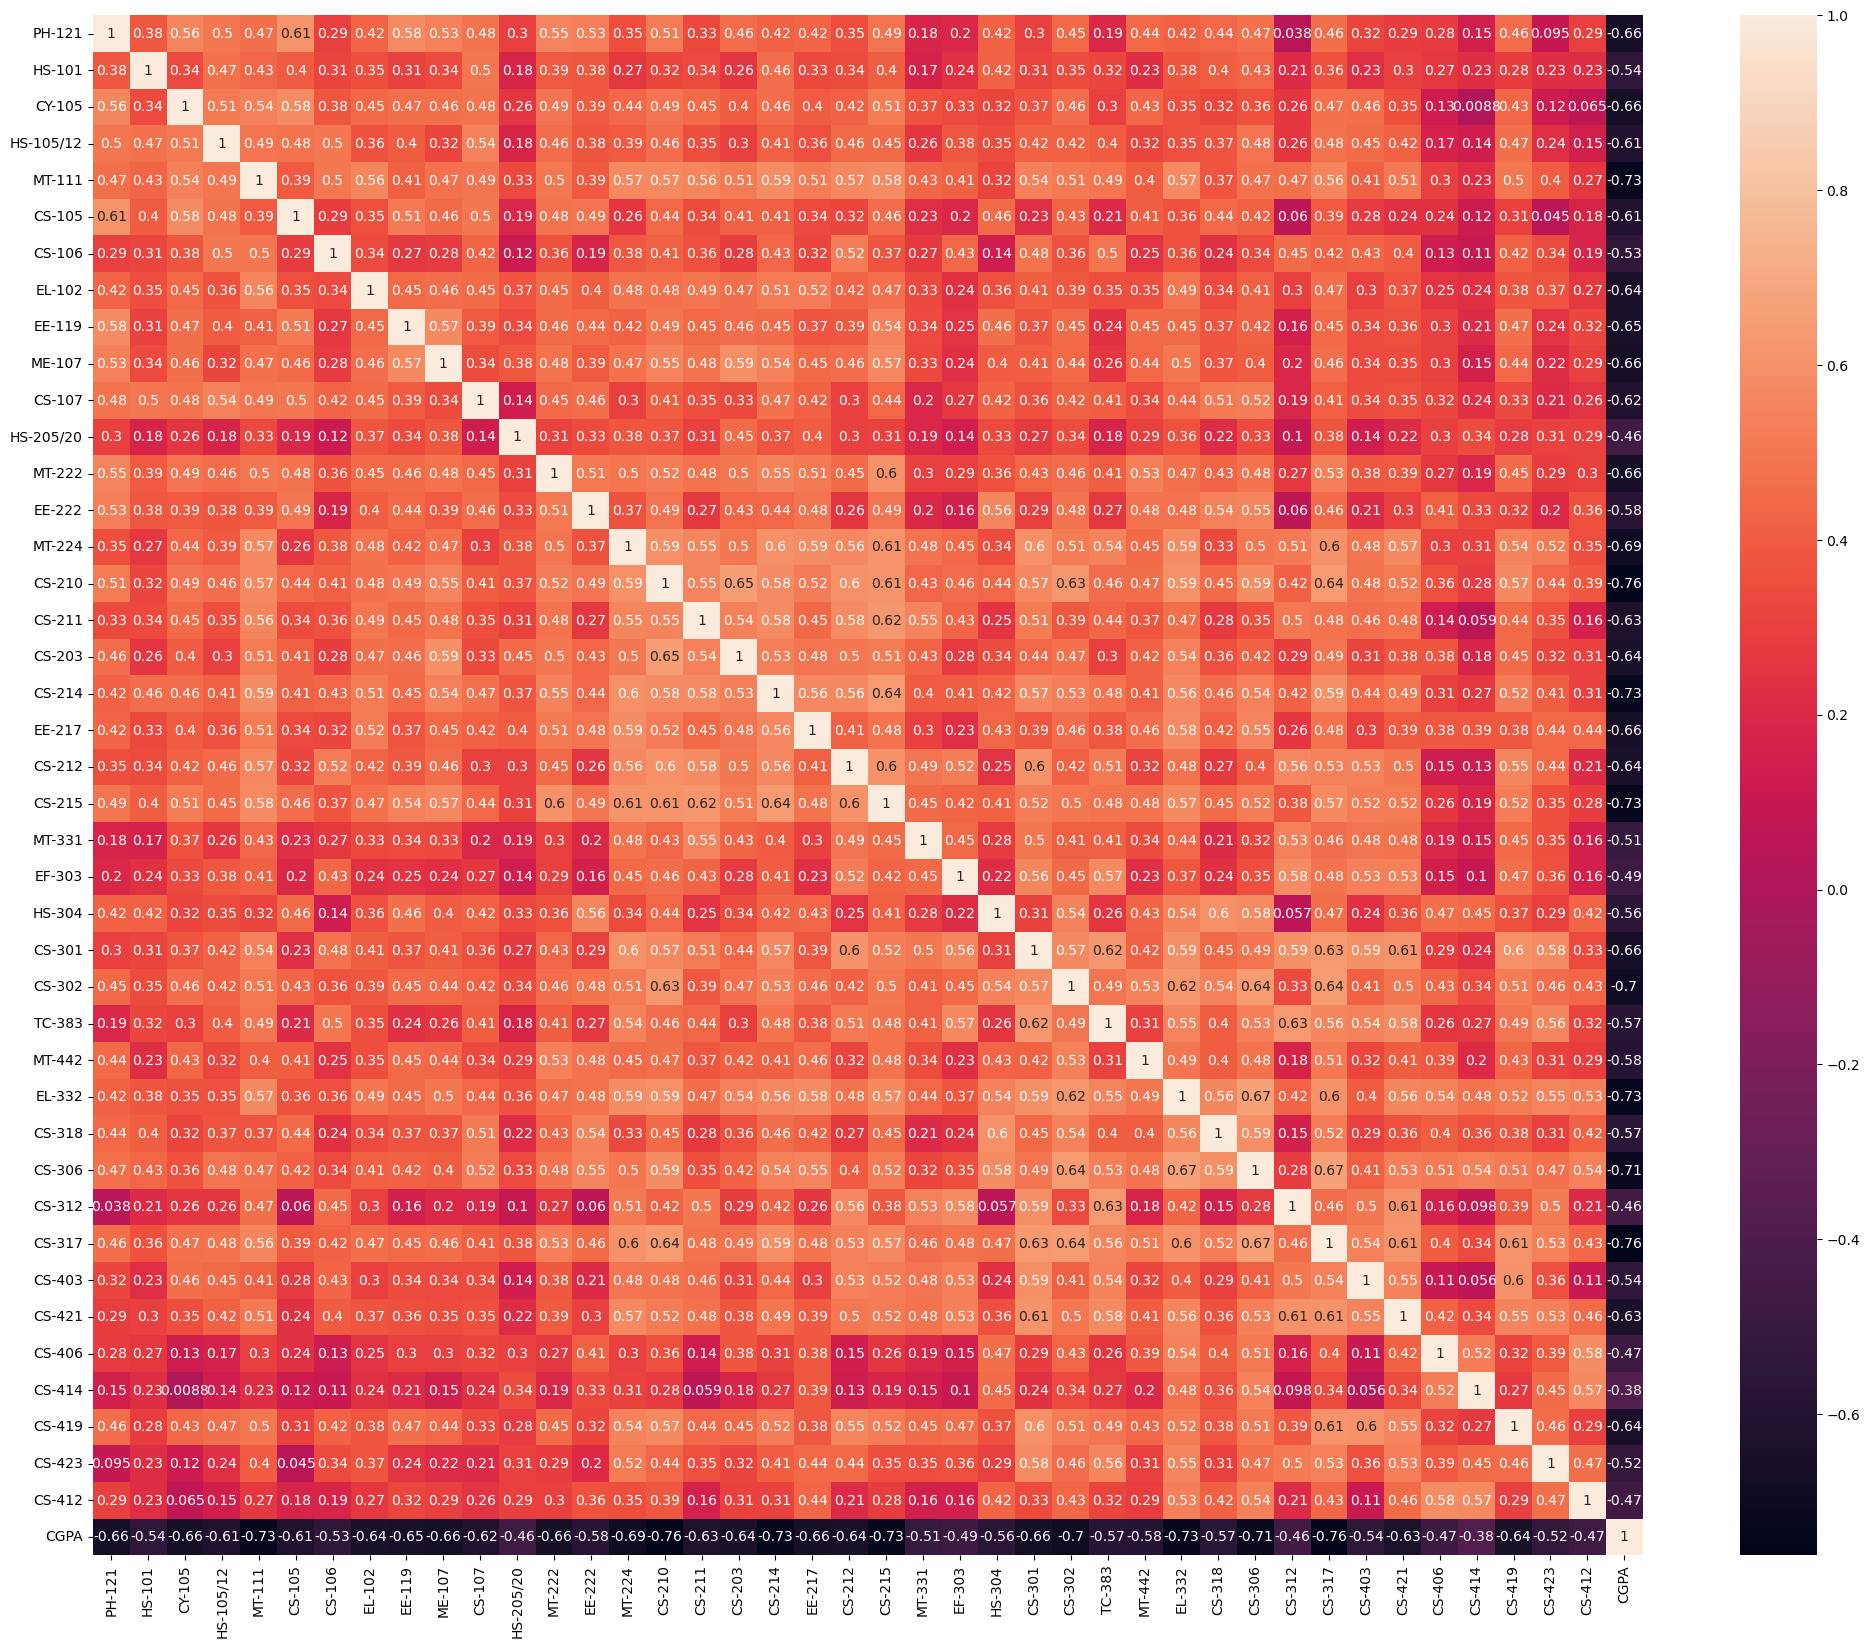

In [25]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Observation
After checking and visualizing

All features are related with labels

Now lets check vif for multicollinearity issue

In [26]:
#Lets use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']= X.columns
#let's check for value
vif

vif   features
0    7.186020     PH-121
1    7.216553     HS-101
2    4.901557     CY-105
3    6.319539  HS-105/12
4    7.045277     MT-111
5    4.986303     CS-105
6    6.090601     CS-106
7    5.328668     EL-102
8    6.871729     EE-119
9    7.531717     ME-107
10   6.015541     CS-107
11   4.164178  HS-205/20
12   6.917284     MT-222
13   5.159140     EE-222
14   8.109806     MT-224
15   7.957425     CS-210
16   8.818168     CS-211
17   7.928625     CS-203
18  10.212911     CS-214
19   6.441621     EE-217
20  10.183904     CS-212
21  10.024615     CS-215
22   4.842517     MT-331
23   8.144962     EF-303
24   9.550895     HS-304
25   9.835638     CS-301
26   8.193846     CS-302
27   7.622994     TC-383
28   4.500446     MT-442
29   9.744613     EL-332
30   8.456632     CS-318
31  10.632539     CS-306
32   7.998359     CS-312
33  12.998889     CS-317
34   5.806260     CS-403
35  13.078386     CS-421
36   5.337957     CS-406
37   4.407717     CS-414
38   9.215959     CS-419
39   7.673021     CS-423
40   6.427448     CS-412

# Observation
from here we can observe that vif value for columns CS-214,CS-212,CS-215,CS-306,CS-317,CS-421 HAVE VIF VALUE GREATER THAN 10 .

it means there is multicollinearity problem ,so lets delete these columns 

In [27]:
X=df.drop(columns=['CS-214','CS-212','CS-215','CS-306','CS-317','CS-421','CGPA'],axis=1)

In [28]:
X.shape

(571, 35)

In [29]:
X

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10       9       8   
1         0       9      10          9       5       6       9       0   
2         0       3       0          5       4       0       5       4   
3         9       7      10          9       9       2      10       8   
4         2       2       2          4       0       0       2       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       3       0       0          2       1       0       2       2   
567       1       0       0          0       0       0       0       2   
568       3       0       2          4       0       0       0       0   
569       0       4       9          0       9      10       5       8   
570       6       9       9          6       6      10       3       7   

     EE-119  ME-107  ...  MT-442  EL-332  CS-318  CS-312  CS-403  CS-406  \
0         5       8  ...       4       6       8       8       8       2   
1        10       9  ...       8       6       2      10       6       2   
2         2       2  ...       0       4       2       3       0       0   
3         9       7  ...       8      10       4      10      10       5   
4         0       2  ...       2       2       5       5       4       2   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       1       4  ...       1       0       0       2       0       0   
567       0       0  ...       1       0       1       4       0       2   
568       0       3  ...       4       3       7       2       0       0   
569       5       8  ...       8       9       5       9       3       9   
570       6      10  ...       2      11       8       7       5      11   

     CS-414  CS-419  CS-423  CS-412  
0         0       8       3       2  
1         5       6       6       3  
2         0       0       2       0  
3         3       7       7       7  
4         0       2       2       0  
..      ...     ...     ...     ...  
566       4       4       3       0  
567       3       2       6       2  
568       6       4       2       2  
569       6       3       5       6  
570       8       4       9       8  

[571 rows x 35 columns]

In [30]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [31]:
#Lets again use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']= X.columns
#let's check for value
vif

vif   features
0   7.089210     PH-121
1   6.964632     HS-101
2   4.860116     CY-105
3   6.005612  HS-105/12
4   6.929386     MT-111
5   4.931687     CS-105
6   5.819321     CS-106
7   5.294738     EL-102
8   6.760551     EE-119
9   7.284360     ME-107
10  5.845613     CS-107
11  4.057789  HS-205/20
12  6.646302     MT-222
13  5.044714     EE-222
14  7.726868     MT-224
15  7.605838     CS-210
16  8.297969     CS-211
17  7.825527     CS-203
18  6.149267     EE-217
19  4.788200     MT-331
20  7.723323     EF-303
21  9.446594     HS-304
22  9.550333     CS-301
23  7.751101     CS-302
24  7.387969     TC-383
25  4.375571     MT-442
26  9.414617     EL-332
27  8.214547     CS-318
28  7.259640     CS-312
29  5.497383     CS-403
30  5.141568     CS-406
31  4.142944     CS-414
32  8.905904     CS-419
33  7.445767     CS-423
34  5.977298     CS-412

# Observation
As our multicollinearity problem is solved we can proceed ahead for model building

# Modelling

In [32]:
#splitting into train and test data
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=112)

In [34]:
#lets import neccesary lib
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
#importing important metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [35]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y1=reg.predict(x_test)
print('R2 score is :',r2_score(y_test,y1))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y1))
print('Mean Squared Error is :',mean_squared_error(y_test,y1))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y1)))

R2 score is : 0.9243737934173162
Mean Absolute Error is : 0.0991020659520805
Mean Squared Error is : 0.02883451385108938
Root Mean Squared Error is : 0.16980728444648474


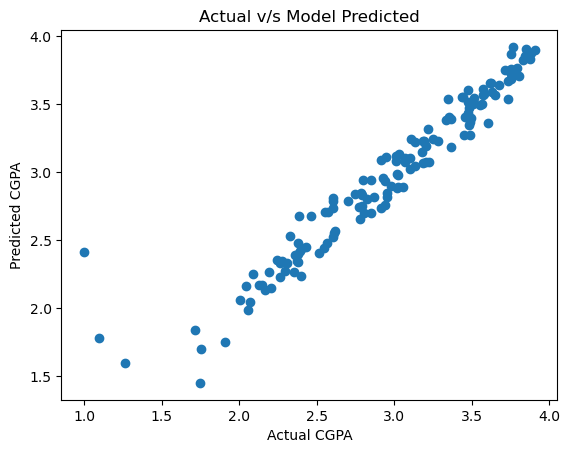

In [36]:
#Let's visualize using scatter plot
plt.scatter(y_test,y1)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual v/s Model Predicted')
plt.show()

In [37]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y2=knn.predict(x_test)
print('R2 score is :',r2_score(y_test,y2))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y2))
print('Mean Squared Error is :',mean_squared_error(y_test,y2))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y2)))

R2 score is : 0.9050372266936099
Mean Absolute Error is : 0.11176783216783218
Mean Squared Error is : 0.03620709706293708
Root Mean Squared Error is : 0.19028162565770002


In [38]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
y3=tree.predict(x_test)
print('R2 score is :',r2_score(y_test,y3))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y3))
print('Mean Squared Error is :',mean_squared_error(y_test,y3))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y3)))

R2 score is : 0.8116165441782142
Mean Absolute Error is : 0.19856643356643358
Mean Squared Error is : 0.07182623076923074
Root Mean Squared Error is : 0.26800416185057785


In [39]:
bag=BaggingRegressor()
bag.fit(x_train,y_train)
y4=bag.predict(x_test)
print('R2 score is :',r2_score(y_test,y4))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y4))
print('Mean Squared Error is :',mean_squared_error(y_test,y4))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y4)))

R2 score is : 0.8882738073431482
Mean Absolute Error is : 0.13933146853146855
Mean Squared Error is : 0.04259859902097902
Root Mean Squared Error is : 0.2063942804948311


In [40]:
rand=RandomForestRegressor()
rand.fit(x_train,y_train)
y5=rand.predict(x_test)
print('R2 score is :',r2_score(y_test,y5))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y5))
print('Mean Squared Error is :',mean_squared_error(y_test,y5))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y5)))

R2 score is : 0.9183463824181942
Mean Absolute Error is : 0.11758741258741252
Mean Squared Error is : 0.031132625495104888
Root Mean Squared Error is : 0.17644439774360898


In [41]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y6=ada.predict(x_test)
print('R2 score is :',r2_score(y_test,y6))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y6))
print('Mean Squared Error is :',mean_squared_error(y_test,y6))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y6)))

R2 score is : 0.8993946802465336
Mean Absolute Error is : 0.16541866896361038
Mean Squared Error is : 0.03835846880344285
Root Mean Squared Error is : 0.19585318175470842


In [42]:
grad=GradientBoostingRegressor()
grad.fit(x_train,y_train)
y7=grad.predict(x_test)
print('R2 score is :',r2_score(y_test,y7))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y7))
print('Mean Squared Error is :',mean_squared_error(y_test,y7))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y7)))

R2 score is : 0.9620239302319399
Mean Absolute Error is : 0.08998802619188702
Mean Squared Error is : 0.014479392253264129
Root Mean Squared Error is : 0.12033034635229856


In [43]:
svr=SVR()
svr.fit(x_train,y_train)
y8=svr.predict(x_test)
print('R2 score is :',r2_score(y_test,y8))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y8))
print('Mean Squared Error is :',mean_squared_error(y_test,y8))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y8)))

R2 score is : 0.9054702385031412
Mean Absolute Error is : 0.09374950774581271
Mean Squared Error is : 0.03604199972983251
Root Mean Squared Error is : 0.1898473063539025


In [44]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y9=xgb.predict(x_test)
print('R2 score is :',r2_score(y_test,y9))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y9))
print('Mean Squared Error is :',mean_squared_error(y_test,y9))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y9)))

R2 score is : 0.9241967067866467
Mean Absolute Error is : 0.1321067504149217
Mean Squared Error is : 0.028902032865140384
Root Mean Squared Error is : 0.17000597890997948


In [45]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y10=lasso.predict(x_test)
print('R2 score is :',r2_score(y_test,y10))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y10))
print('Mean Squared Error is :',mean_squared_error(y_test,y10))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y10)))

R2 score is : 0.3479851404349502
Mean Absolute Error is : 0.40667553451173016
Mean Squared Error is : 0.248598103075413
Root Mean Squared Error is : 0.4985961322306993


In [46]:
ridge=Ridge()
ridge.fit(x_train,y_train)
y11=ridge.predict(x_test)
print('R2 score is :',r2_score(y_test,y11))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y11))
print('Mean Squared Error is :',mean_squared_error(y_test,y11))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y11)))


R2 score is : 0.9243884078531484
Mean Absolute Error is : 0.09907680323669361
Mean Squared Error is : 0.02882894170657133
Root Mean Squared Error is : 0.16979087639379017


# Observation 
from above results it is clear that our gradient boosting regressor is giving best score i.e 96.20%.

Let's check cross val score for all models 

In [47]:
#import cross val score
from sklearn.model_selection import cross_val_score

In [48]:
score1=cross_val_score(reg,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y1)-score1.mean())*100)

Difference of r2_score and cross vald score is : 2.2723292616885438


In [49]:
score2=cross_val_score(knn,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y2)-score2.mean())*100)

Difference of r2_score and cross vald score is : 1.7264812889249526


In [50]:
score3=cross_val_score(tree,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y3)-score3.mean())*100)

Difference of r2_score and cross vald score is : 12.493487143778237


In [51]:
score4=cross_val_score(bag,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y4)-score4.mean())*100)

Difference of r2_score and cross vald score is : 2.423835623633408


In [52]:
score5=cross_val_score(rand,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y5)-score5.mean())*100)

Difference of r2_score and cross vald score is : 3.1851483484771848


In [53]:
score6=cross_val_score(ada,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y6)-score6.mean())*100)

Difference of r2_score and cross vald score is : 5.879436019429917


In [54]:
score7=cross_val_score(grad,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y7)-score7.mean())*100)

Difference of r2_score and cross vald score is : 5.914029619397276


In [55]:
score8=cross_val_score(svr,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y8)-score8.mean())*100)

Difference of r2_score and cross vald score is : 0.18020181414102332


In [56]:
score9=cross_val_score(xgb,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y9)-score9.mean())*100)

Difference of r2_score and cross vald score is : 3.514791062479272


In [57]:
score10=cross_val_score(lasso,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y10)-score10.mean())*100)

Difference of r2_score and cross vald score is : 3.3779801870934376


In [58]:
score11=cross_val_score(ridge,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y11)-score11.mean())*100)

Difference of r2_score and cross vald score is : 2.2722835645557105


# Observation
As per the difference between r2score and cross val score our SVR model is giving better score

Now lets tune our parameter using Grid Search cv

In [59]:
from sklearn.model_selection import GridSearchCV

In [65]:
param={
       'C':[1,5,10,15,20],
      'epsilon':[0.2,0.5,0.6,1.0,1.2,1.5],
       'gamma':[0.001,0.1,0.2,0.002,0.02]
      }
gridsearch=GridSearchCV(estimator=svr,param_grid=param,cv=5)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 1, 'epsilon': 0.2, 'gamma': 0.001}

In [66]:
best=gridsearch.best_estimator_
best.fit(x_train,y_train)
y12=best.predict(x_test)
print('R2 score is :',r2_score(y_test,y12))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y12))
print('Mean Squared Error is :',mean_squared_error(y_test,y12))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y12)))

R2 score is : 0.9259086636635452
Mean Absolute Error is : 0.0911308857081157
Mean Squared Error is : 0.02824930352024821
Root Mean Squared Error is : 0.16807529122464196


In [67]:
score12=cross_val_score(best,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y12)-score12.mean())*100)

Difference of r2_score and cross vald score is : 1.444608144591153


# Observation
As per the observation our svr model was performing best and after tuning parameters 'Model Name'-best, is our best model.